# 一、EDA 目标

- EDA 的价值主要在于熟悉数据集，了解数据集，对数据集进行验证（确定数据集可以用于接下来的机器学习或者深度学习使用）。
- 当了解了数据集之后，我们下一步就是要去了解变量间的相互关系，以及变量与预测值之间的存在关系。
- 引导数据科学从业者进行数据处理，以及特征工程的步骤，使数据集的结构和特征集能让接下来的预测问题更加可靠。
- 完成对于数据的探索性分析，并对数据进行一些图表或者文字总结并打卡。

# 二、内容介绍

1. 载入各种数据科学以及可视化库：
    - 数据科学库：pandas、numpy、scipy
    - 可视化库：matplotlib、seaborn
    - 其他库
2. 载入数据：
    - 载入训练集和测试集
    - 简略观察数据 .head() + .shape
3. 数据总览
    - 通过 .describe() 来熟悉数据的相关统计量
    - 通过 .info() 来熟悉数据类型
4. 判断数据缺失和异常
    - 查看每列的存在 NaN 情况
    - 异常值检测
5. 了解预测值的分布
    - 总分布概况（无界约翰逊分布等）
    - 查看 skewness and kurtosis
    - 查看预测值的具体频数
6. 特征分布为类别特征和数字特征，并对类别特征查看 unique 分布
7. 数字特征分析
    - 相关性分析
    - 查看几个特征的偏度和峰值
    - 每个数字特征的分布可视化
    - 多变量相互回归关系可视化
8. 类型特征分析
    - unique 分布
    - 类别特征箱型图可视化
    - 类别特征的小提琴图可视化
    - 类别特征的柱形图可视化
    - 特征的每个类别频数可视化（count_plot）
9. 用 pandas_profiling 生成数据报告

# 三、代码示例

## 载入各种数据科学以及可视化库

> 以下库都是 pip install 安装的，有特殊情况我会单独说明。

In [2]:
# coding:utf-8
# 导入 warnings 包，利用过滤器来实现忽略警告语句。
import warnings

warnings.filterwarnings('ignore')

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

def get_project_path(*paths):
    """获取项目路径的统一方法"""
    try:
        current_dir = os.path.dirname(os.path.dirname(__file__))
        project_path = os.path.dirname(current_dir)
        return os.path.join(project_path, *paths)
    except NameError:
        project_path = os.getcwd()
        return os.path.join(project_path, *paths)

## 载入数据

In [3]:
## 1) 载入训练集和测试集
Train_data = pd.read_csv(get_project_path('data', 'used_car_train_20200313.csv'), sep=' ')
Test_data = pd.read_csv(get_project_path('data', 'used_car_testB_20200421.csv'), sep=' ')

### 所有特征集均脱敏处理（方便大家观看）

- name - 汽车编码
- regDate - 汽车注册时间
- model - 车型编码
- brand - 品牌
- bodyType - 车身类型
- fuelType - 燃油类型
- gearbox - 变速箱
- power - 汽车功率
- kilometer - 汽车行驶里程
- notRepairedDamage - 汽车有尚未修复的损坏
- regionCode - 看车地区编码
- seller - 销售方
- offerType - 报价类型
- creatDate - 广告发布时间
- price - 汽车价格
- v\_0, v\_1, v\_2, v\_3, v\_4, v\_5, v\_6, v\_7, v\_8, v\_9, v\_10, v\_11, v\_12, v\_13, v\_14 - 匿名特征，包含 v0 - v14 在内 15 个匿名特征

In [4]:
## 2) 简略观察数据（.head() + .shape）
pd.concat([Train_data.head(), Train_data.tail()])

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,notRepairedDamage,regionCode,seller,offerType,creatDate,price,v_0,v_1,v_2,v_3,v_4,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
0,0,736,20040402,30.0,6,1.0,0.0,0.0,60,12.5,0.0,1046,0,0,20160404,1850,43.357796,3.966344,0.050257,2.159744,1.143786,0.235676,0.101988,0.129549,0.022816,0.097462,-2.881803,2.804097,-2.420821,0.795292,0.914762
1,1,2262,20030301,40.0,1,2.0,0.0,0.0,0,15.0,-,4366,0,0,20160309,3600,45.305273,5.236112,0.137925,1.380657,-1.422165,0.264777,0.121004,0.135731,0.026597,0.020582,-4.900482,2.096338,-1.030483,-1.722674,0.245522
2,2,14874,20040403,115.0,15,1.0,0.0,0.0,163,12.5,0.0,2806,0,0,20160402,6222,45.978359,4.823792,1.319524,-0.998467,-0.996911,0.251410,0.114912,0.165147,0.062173,0.027075,-4.846749,1.803559,1.565330,-0.832687,-0.229963
3,3,71865,19960908,109.0,10,0.0,0.0,1.0,193,15.0,0.0,434,0,0,20160312,2400,45.687478,4.492574,-0.050616,0.883600,-2.228079,0.274293,0.110300,0.121964,0.033395,0.000000,-4.509599,1.285940,-0.501868,-2.438353,-0.478699
4,4,111080,20120103,110.0,5,1.0,0.0,0.0,68,5.0,0.0,6977,0,0,20160313,5200,44.383511,2.031433,0.572169,-1.571239,2.246088,0.228036,0.073205,0.091880,0.078819,0.121534,-1.896240,0.910783,0.931110,2.834518,1.923482
149995,149995,163978,20000607,121.0,10,4.0,0.0,1.0,163,15.0,0.0,4576,0,0,20160327,5900,45.316543,-3.139095,-1.269707,-0.736609,-1.505820,0.280264,0.000310,0.048441,0.071158,0.019174,1.988114,-2.983973,0.589167,-1.304370,-0.302592
149996,149996,184535,20091102,116.0,11,0.0,0.0,0.0,125,10.0,0.0,2826,0,0,20160312,9500,45.972058,-3.143764,-0.023523,-2.366699,0.698012,0.253217,0.000777,0.084079,0.099681,0.079371,1.839166,-2.774615,2.553994,0.924196,-0.272160
149997,149997,147587,20101003,60.0,11,1.0,1.0,0.0,90,6.0,0.0,3302,0,0,20160328,7500,44.733481,-3.105721,0.595454,-2.279091,1.423661,0.233353,0.000705,0.118872,0.100118,0.097914,2.439812,-1.630677,2.290197,1.891922,0.414931
149998,149998,45907,20060312,34.0,10,3.0,1.0,0.0,156,15.0,0.0,1877,0,0,20160401,4999,45.658634,-3.204785,-0.441680,-1.179812,0.620680,0.256369,0.000252,0.081479,0.083558,0.081498,2.075380,-2.633719,1.414937,0.431981,-1.659014
149999,149999,177672,19990204,19.0,28,6.0,0.0,1.0,193,12.5,0.0,235,0,0,20160305,4700,45.536383,-3.200326,-1.612893,-0.067144,-1.396166,0.284475,0.000000,0.040072,0.062543,0.025819,1.978453,-3.179913,0.031724,-1.483350,-0.342674


In [5]:
Train_data.shape

(150000, 31)

In [6]:
pd.concat([Test_data.head(), Test_data.tail()])

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,notRepairedDamage,regionCode,seller,offerType,creatDate,v_0,v_1,v_2,v_3,v_4,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
0,200000,133777,20000501,67.0,0,1.0,0.0,0.0,101,15.0,0.0,5019,0,0,20160308,42.142061,-3.094739,-0.721300,1.466344,1.009846,0.236520,0.000241,0.105319,0.046233,0.094522,3.619512,-0.280607,-2.019761,0.978828,0.803322
1,200001,61206,19950211,19.0,6,2.0,0.0,0.0,73,6.0,0.0,1505,0,0,20160310,43.907034,-3.244605,-0.766430,1.276718,-1.065338,0.261518,0.000000,0.120323,0.046784,0.035385,2.997376,-1.406705,-1.020884,-1.349990,-0.200542
2,200002,67829,20090606,5.0,5,4.0,0.0,0.0,120,5.0,-,1776,0,0,20160309,45.389665,3.372384,-0.965565,-2.447316,0.624268,0.261691,0.090836,0.000000,0.079655,0.073586,-3.951084,-0.433467,0.918964,1.634604,1.027173
3,200003,8892,20020601,22.0,9,1.0,0.0,0.0,58,15.0,0.0,26,0,0,20160314,42.788775,4.035052,-0.217403,1.708806,1.119165,0.236050,0.101777,0.098950,0.026830,0.096614,-2.846788,2.800267,-2.524610,1.076819,0.461610
4,200004,76998,20030301,46.0,6,0.0,NaN,0.0,116,15.0,0.0,738,0,0,20160306,43.670763,-3.135382,-1.134107,0.470315,0.134032,0.257000,0.000000,0.066732,0.057771,0.068852,2.839010,-1.659801,-0.924142,0.199423,0.451014
49995,249995,111443,20041005,4.0,4,0.0,NaN,1.0,150,15.0,-,5564,0,0,20160309,46.321013,-3.304401,0.073363,-0.622359,-0.778349,0.263668,0.000292,0.141804,0.076393,0.039272,2.072901,-2.531869,1.716978,-1.063437,0.326587
49996,249996,152834,20130409,65.0,1,0.0,0.0,0.0,179,4.0,0.0,5220,0,0,20160323,48.086547,-3.318641,0.965881,-2.672160,0.357440,0.255310,0.000991,0.155868,0.108425,0.067841,1.358504,-3.290295,4.269809,0.140524,0.556221
49997,249997,132531,20041211,4.0,4,0.0,0.0,1.0,147,12.5,0.0,3795,0,0,20160316,46.145279,-3.305263,-0.015283,-0.288329,-0.687112,0.262933,0.000318,0.141872,0.071968,0.042966,2.165658,-2.417885,1.370612,-1.073133,0.270602
49998,249998,143405,20020702,40.0,1,4.0,0.0,1.0,176,15.0,0.0,61,0,0,20160327,45.507088,-3.197006,-1.141252,-0.434930,-1.845040,0.282106,0.000023,0.067483,0.067526,0.009006,2.030114,-2.939244,0.569078,-1.718245,0.316379
49999,249999,78202,20090708,32.0,8,1.0,0.0,0.0,0,3.0,0.0,4158,0,0,20160401,44.289471,4.181452,0.547068,-0.775841,1.789601,0.231449,0.103947,0.096027,0.062328,0.110180,-3.689090,2.032376,0.109157,2.202828,0.847469


In [7]:
Test_data.shape

(50000, 30)

要养成看数据集的 .head() 以及 .shape 的习惯，这会让你每一步都更放心。如果对自己的 pandas 等操作不放心，建议执行下看看，这样会有效的方便你进行函数理解和操作。

## 总览数据概况

1. .describe() 中有每列的统计量，个数（count）、平均值（mean）、方差（std）、最小值（min）、中位数（25% 50% 75%）、最大值（max）等信息。看这个信息主要是瞬间掌握数据的大概范围以及每个值的异常值的判断。比如有的时候会发现 9999999，-1 等值，这些其实都是 NaN 的另一种表达方式，有的时候需要注意下
2. .info() 通过 .info() 来了解数据每列的 type，有助于了解是否存在除了 NaN 以外的特殊符号异常。

In [8]:
## 1) 通过 .describe() 来熟悉数据的相关统计量
Train_data.describe()

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,regionCode,seller,offerType,creatDate,price,v_0,v_1,v_2,v_3,v_4,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
count,150000.000000,150000.000000,1.500000e+05,149999.000000,150000.000000,145494.000000,141320.000000,144019.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.0,1.500000e+05,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000
mean,74999.500000,68349.172873,2.003417e+07,47.129021,8.052733,1.792369,0.375842,0.224943,119.316547,12.597160,2583.077267,0.000007,0.0,2.016033e+07,5923.327333,44.406268,-0.044809,0.080765,0.078833,0.017875,0.248204,0.044923,0.124692,0.058144,0.061996,-0.001000,0.009035,0.004813,0.000313,-0.000688
std,43301.414527,61103.875095,5.364988e+04,49.536040,7.864956,1.760640,0.548677,0.417546,177.168419,3.919576,1885.363218,0.002582,0.0,1.067328e+02,7501.998477,2.457548,3.641893,2.929618,2.026514,1.193661,0.045804,0.051743,0.201410,0.029186,0.035692,3.772386,3.286071,2.517478,1.288988,1.038685
min,0.000000,0.000000,1.991000e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.0,2.015062e+07,11.000000,30.451976,-4.295589,-4.470671,-7.275037,-4.364565,0.000000,0.000000,0.000000,0.000000,0.000000,-9.168192,-5.558207,-9.639552,-4.153899,-6.546556
25%,37499.750000,11156.000000,1.999091e+07,10.000000,1.000000,0.000000,0.000000,0.000000,75.000000,12.500000,1018.000000,0.000000,0.0,2.016031e+07,1300.000000,43.135799,-3.192349,-0.970671,-1.462580,-0.921191,0.243615,0.000038,0.062474,0.035334,0.033930,-3.722303,-1.951543,-1.871846,-1.057789,-0.437034
50%,74999.500000,51638.000000,2.003091e+07,30.000000,6.000000,1.000000,0.000000,0.000000,110.000000,15.000000,2196.000000,0.000000,0.0,2.016032e+07,3250.000000,44.610266,-3.052671,-0.382947,0.099722,-0.075910,0.257798,0.000812,0.095866,0.057014,0.058484,1.624076,-0.358053,-0.130753,-0.036245,0.141246
75%,112499.250000,118841.250000,2.007111e+07,66.000000,13.000000,3.000000,1.000000,0.000000,150.000000,15.000000,3843.000000,0.000000,0.0,2.016033e+07,7700.000000,46.004721,4.000670,0.241335,1.565838,0.868758,0.265297,0.102009,0.125243,0.079382,0.087491,2.844357,1.255022,1.776933,0.942813,0.680378
max,149999.000000,196812.000000,2.015121e+07,247.000000,39.000000,7.000000,6.000000,1.000000,19312.000000,15.000000,8120.000000,1.000000,0.0,2.016041e+07,99999.000000,52.304178,7.320308,19.035496,9.854702,6.829352,0.291838,0.151420,1.404936,0.160791,0.222787,12.357011,18.819042,13.847792,11.147669,8.658418


In [9]:
Test_data.describe()

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,regionCode,seller,offerType,creatDate,v_0,v_1,v_2,v_3,v_4,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
count,50000.000000,50000.000000,5.000000e+04,50000.00000,50000.000000,48496.000000,47076.000000,48032.000000,50000.000000,50000.000000,50000.000000,50000.0,50000.0,5.000000e+04,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,224999.500000,68505.606100,2.003401e+07,47.64948,8.087140,1.793736,0.376498,0.226953,119.766960,12.598260,2581.080680,0.0,0.0,2.016033e+07,44.400023,-0.065525,0.079706,0.078381,0.022361,0.248147,0.044624,0.124693,0.058198,0.062113,0.019633,0.002759,0.004342,0.004570,-0.007209
std,14433.901067,61032.124271,5.351615e+04,49.90741,7.899648,1.764970,0.549281,0.418866,206.313348,3.912519,1889.248559,0.0,0.0,1.113395e+02,2.459920,3.636631,2.930829,2.019136,1.194215,0.045836,0.051664,0.201440,0.029171,0.035723,3.764095,3.289523,2.515912,1.287194,1.044718
min,200000.000000,1.000000,1.991000e+07,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.0,0.0,2.014031e+07,31.122325,-4.231855,-4.032142,-5.801254,-4.233626,0.000000,0.000000,0.000000,0.000000,0.000000,-9.119719,-5.662163,-8.291868,-4.157649,-6.098192
25%,212499.750000,11315.000000,1.999100e+07,11.00000,1.000000,0.000000,0.000000,0.000000,75.000000,12.500000,1006.000000,0.0,0.0,2.016031e+07,43.120935,-3.193169,-0.967832,-1.456793,-0.922153,0.243436,0.000035,0.062519,0.035413,0.033880,-3.675196,-1.963928,-1.865406,-1.048722,-0.440706
50%,224999.500000,52215.000000,2.003091e+07,30.00000,6.000000,1.000000,0.000000,0.000000,110.000000,15.000000,2204.500000,0.0,0.0,2.016032e+07,44.601493,-3.053506,-0.384910,0.118448,-0.068187,0.257818,0.000801,0.095880,0.056804,0.058749,1.632134,-0.375537,-0.138943,-0.036352,0.136849
75%,237499.250000,118710.750000,2.007110e+07,66.00000,13.000000,3.000000,1.000000,0.000000,150.000000,15.000000,3842.000000,0.0,0.0,2.016033e+07,45.987018,3.978703,0.239689,1.563490,0.871565,0.265263,0.101654,0.125470,0.079387,0.087624,2.846205,1.263451,1.775632,0.945239,0.685555
max,249999.000000,196808.000000,2.015121e+07,246.00000,39.000000,7.000000,6.000000,1.000000,19211.000000,15.000000,8120.000000,0.0,0.0,2.016041e+07,51.676686,7.190759,18.865988,9.386558,4.959106,0.291176,0.153403,1.411559,0.157458,0.211304,12.177864,18.789496,13.384828,5.635374,2.649768


In [10]:
## 2) 通过 .info() 来熟悉数据类型
Train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 31 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   SaleID             150000 non-null  int64  
 1   name               150000 non-null  int64  
 2   regDate            150000 non-null  int64  
 3   model              149999 non-null  float64
 4   brand              150000 non-null  int64  
 5   bodyType           145494 non-null  float64
 6   fuelType           141320 non-null  float64
 7   gearbox            144019 non-null  float64
 8   power              150000 non-null  int64  
 9   kilometer          150000 non-null  float64
 10  notRepairedDamage  150000 non-null  object 
 11  regionCode         150000 non-null  int64  
 12  seller             150000 non-null  int64  
 13  offerType          150000 non-null  int64  
 14  creatDate          150000 non-null  int64  
 15  price              150000 non-null  int64  
 16  v_

In [11]:
Test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   SaleID             50000 non-null  int64  
 1   name               50000 non-null  int64  
 2   regDate            50000 non-null  int64  
 3   model              50000 non-null  float64
 4   brand              50000 non-null  int64  
 5   bodyType           48496 non-null  float64
 6   fuelType           47076 non-null  float64
 7   gearbox            48032 non-null  float64
 8   power              50000 non-null  int64  
 9   kilometer          50000 non-null  float64
 10  notRepairedDamage  50000 non-null  object 
 11  regionCode         50000 non-null  int64  
 12  seller             50000 non-null  int64  
 13  offerType          50000 non-null  int64  
 14  creatDate          50000 non-null  int64  
 15  v_0                50000 non-null  float64
 16  v_1                500

## 判断数据缺失和异常

In [12]:
## 1) 查看每列的存在 NaN 情况
Train_data.isnull().sum()

SaleID                  0
name                    0
regDate                 0
model                   1
brand                   0
bodyType             4506
fuelType             8680
gearbox              5981
power                   0
kilometer               0
notRepairedDamage       0
regionCode              0
seller                  0
offerType               0
creatDate               0
price                   0
v_0                     0
v_1                     0
v_2                     0
v_3                     0
v_4                     0
v_5                     0
v_6                     0
v_7                     0
v_8                     0
v_9                     0
v_10                    0
v_11                    0
v_12                    0
v_13                    0
v_14                    0
dtype: int64

In [13]:
Test_data.isnull().sum()

SaleID                  0
name                    0
regDate                 0
model                   0
brand                   0
bodyType             1504
fuelType             2924
gearbox              1968
power                   0
kilometer               0
notRepairedDamage       0
regionCode              0
seller                  0
offerType               0
creatDate               0
v_0                     0
v_1                     0
v_2                     0
v_3                     0
v_4                     0
v_5                     0
v_6                     0
v_7                     0
v_8                     0
v_9                     0
v_10                    0
v_11                    0
v_12                    0
v_13                    0
v_14                    0
dtype: int64

<Axes: >

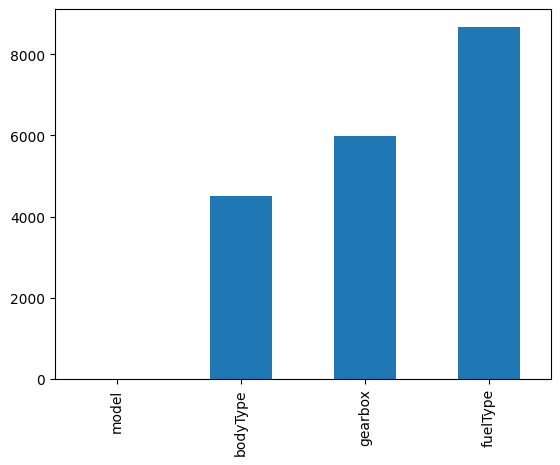

In [14]:
# NaN 可视化
missing = Train_data.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar()

通过以上两句可以很直观的了解哪些列存在“NaN”，并可以把 NaN 的个数打印出来。主要的目的在于 NaN 存在的个数是否真的很大。如果很小一班选择填充；如果使用 lgb 等树模型可以直接空缺，让树自己去优化，但如果 NaN 存在的过多，可以考虑删除。

<Axes: >

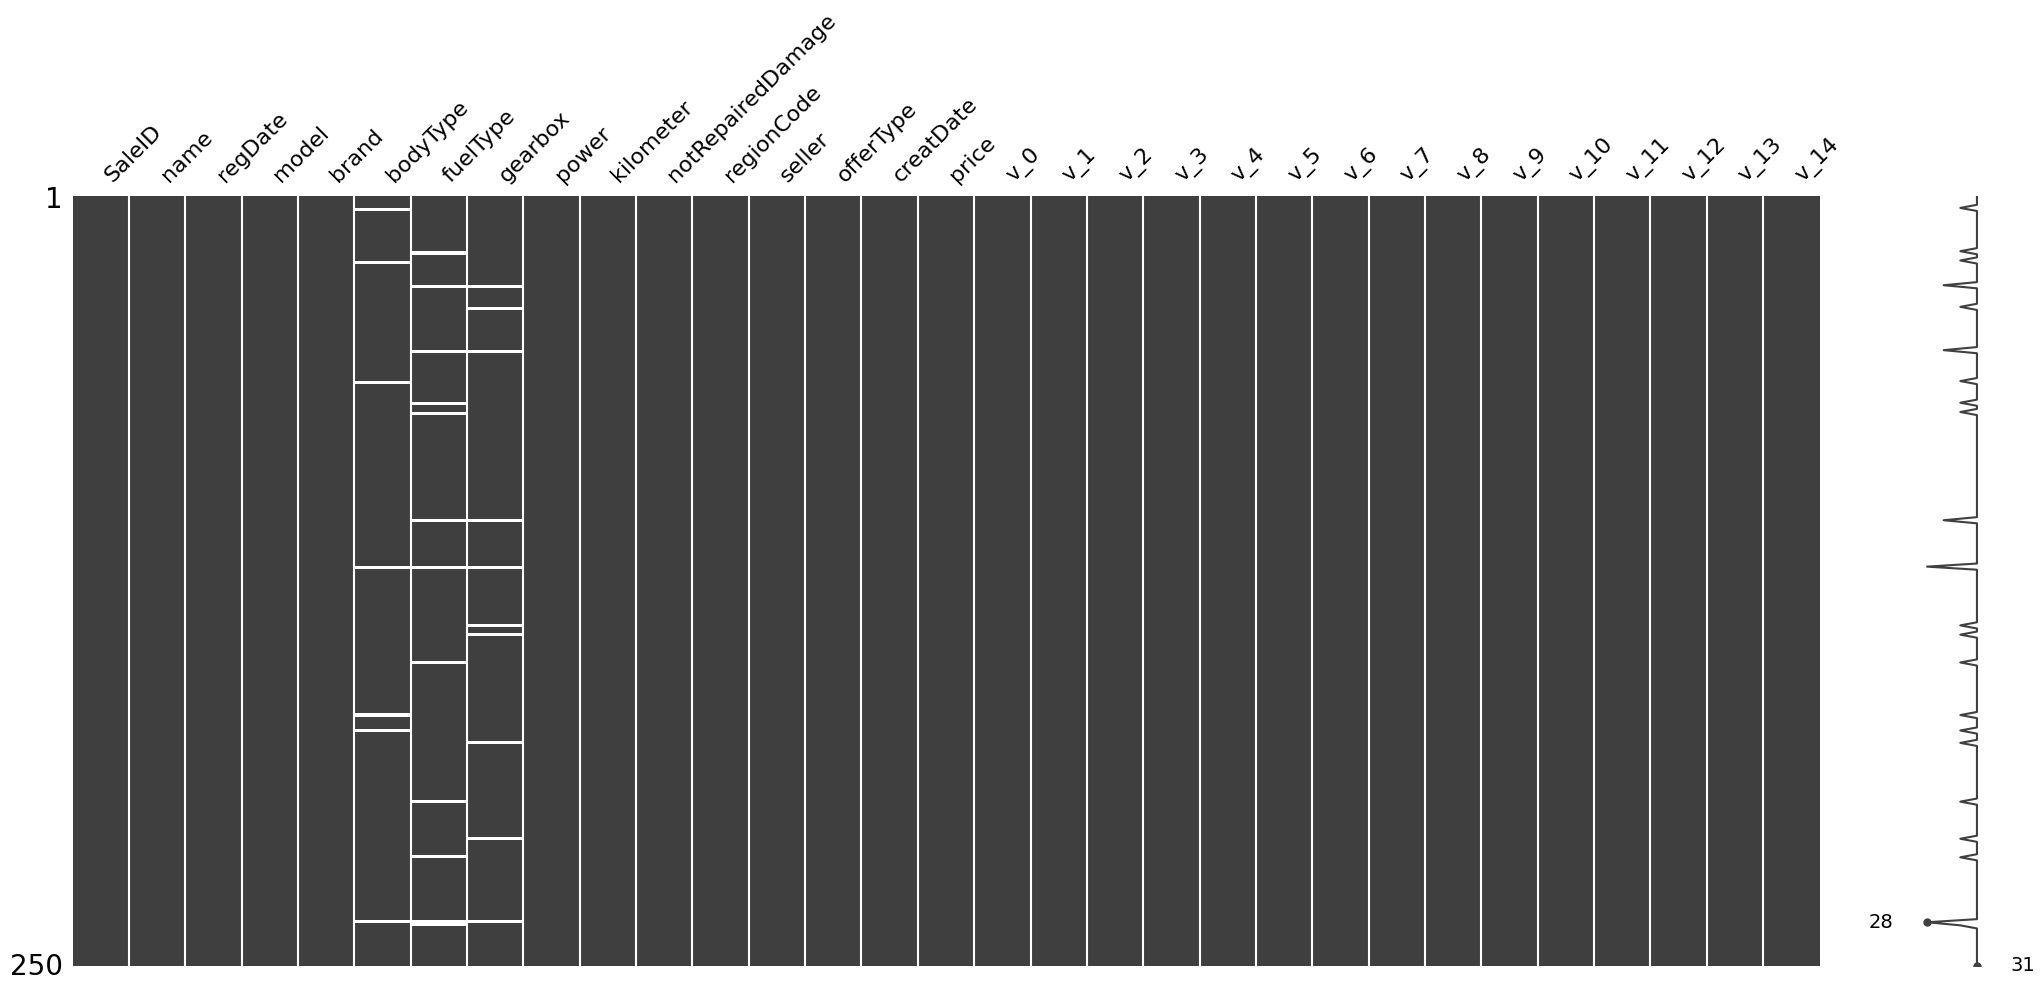

In [15]:
# 可视化看下缺省值
msno.matrix(Train_data.sample(250))

<Axes: >

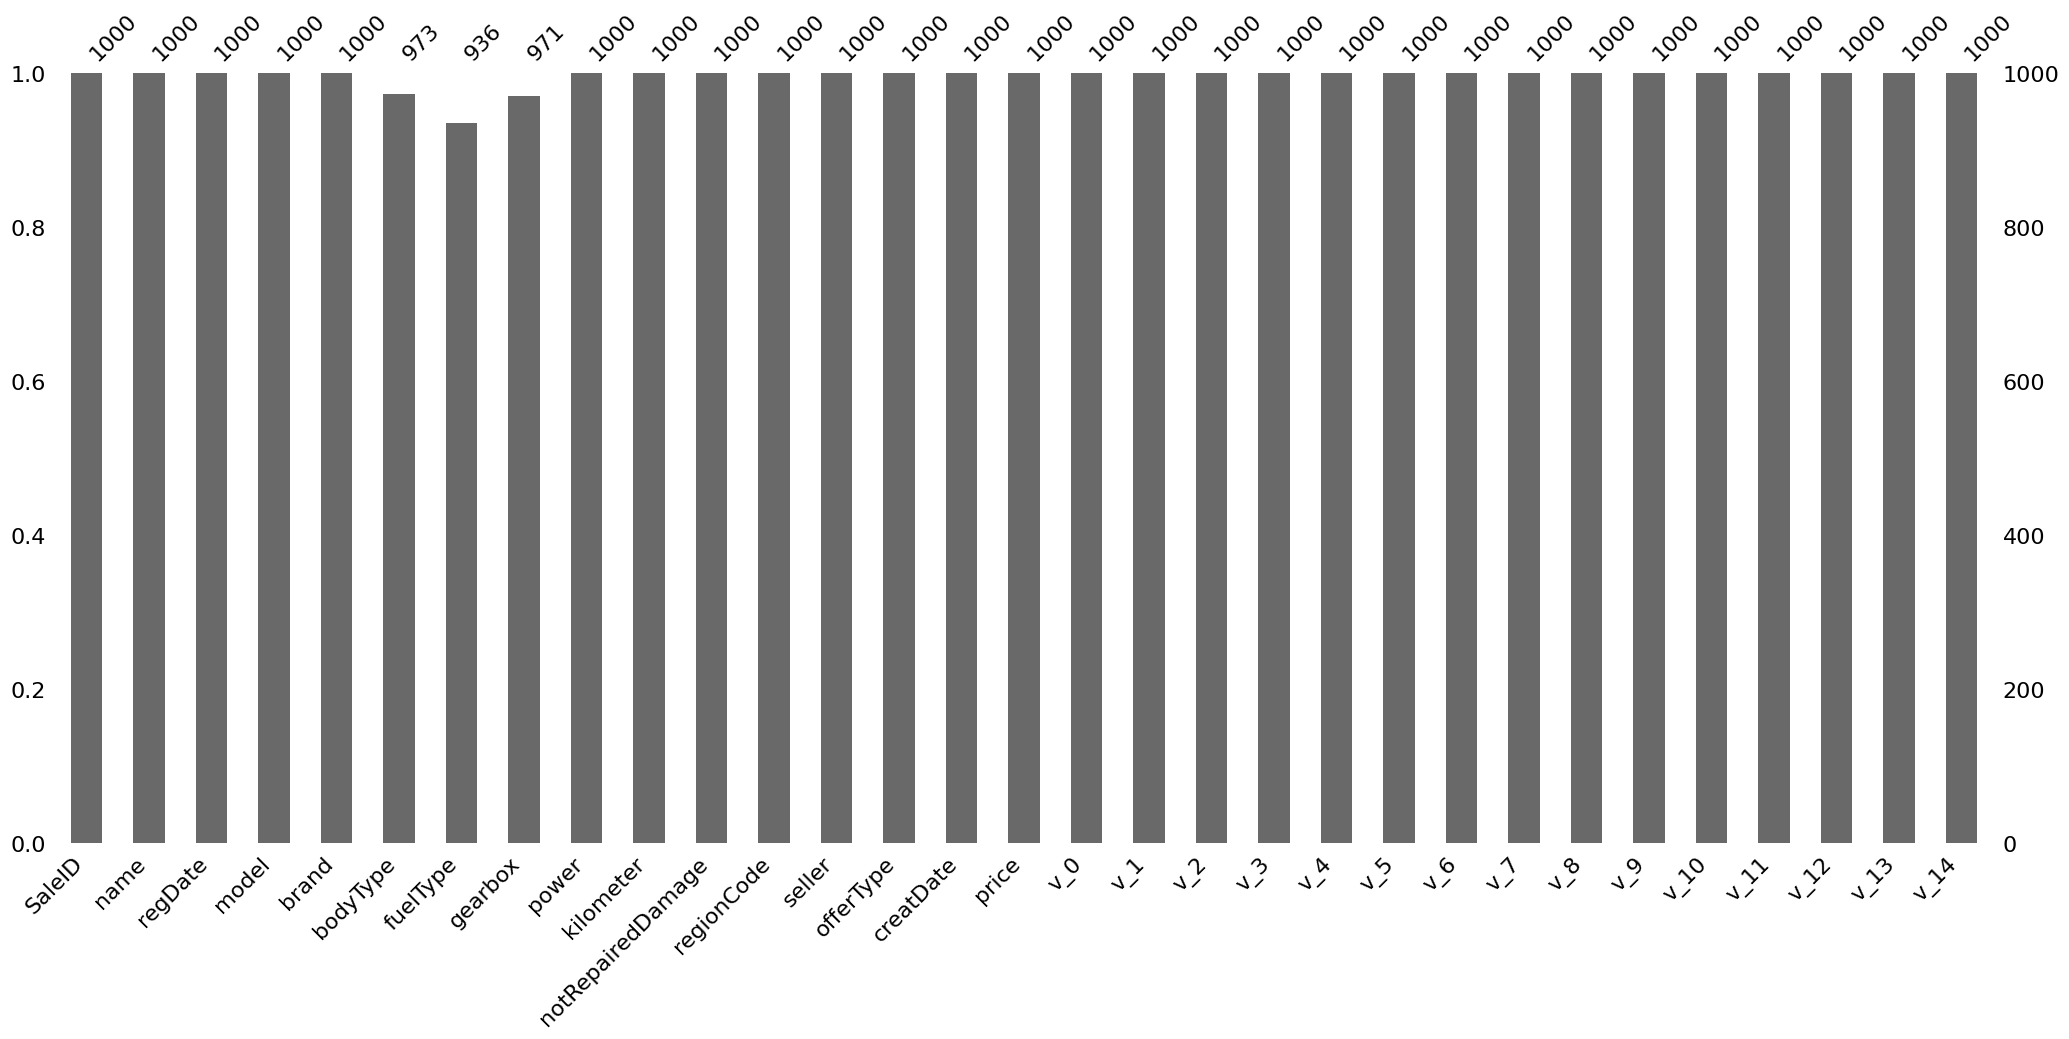

In [16]:
msno.bar(Train_data.sample(1000))

<Axes: >

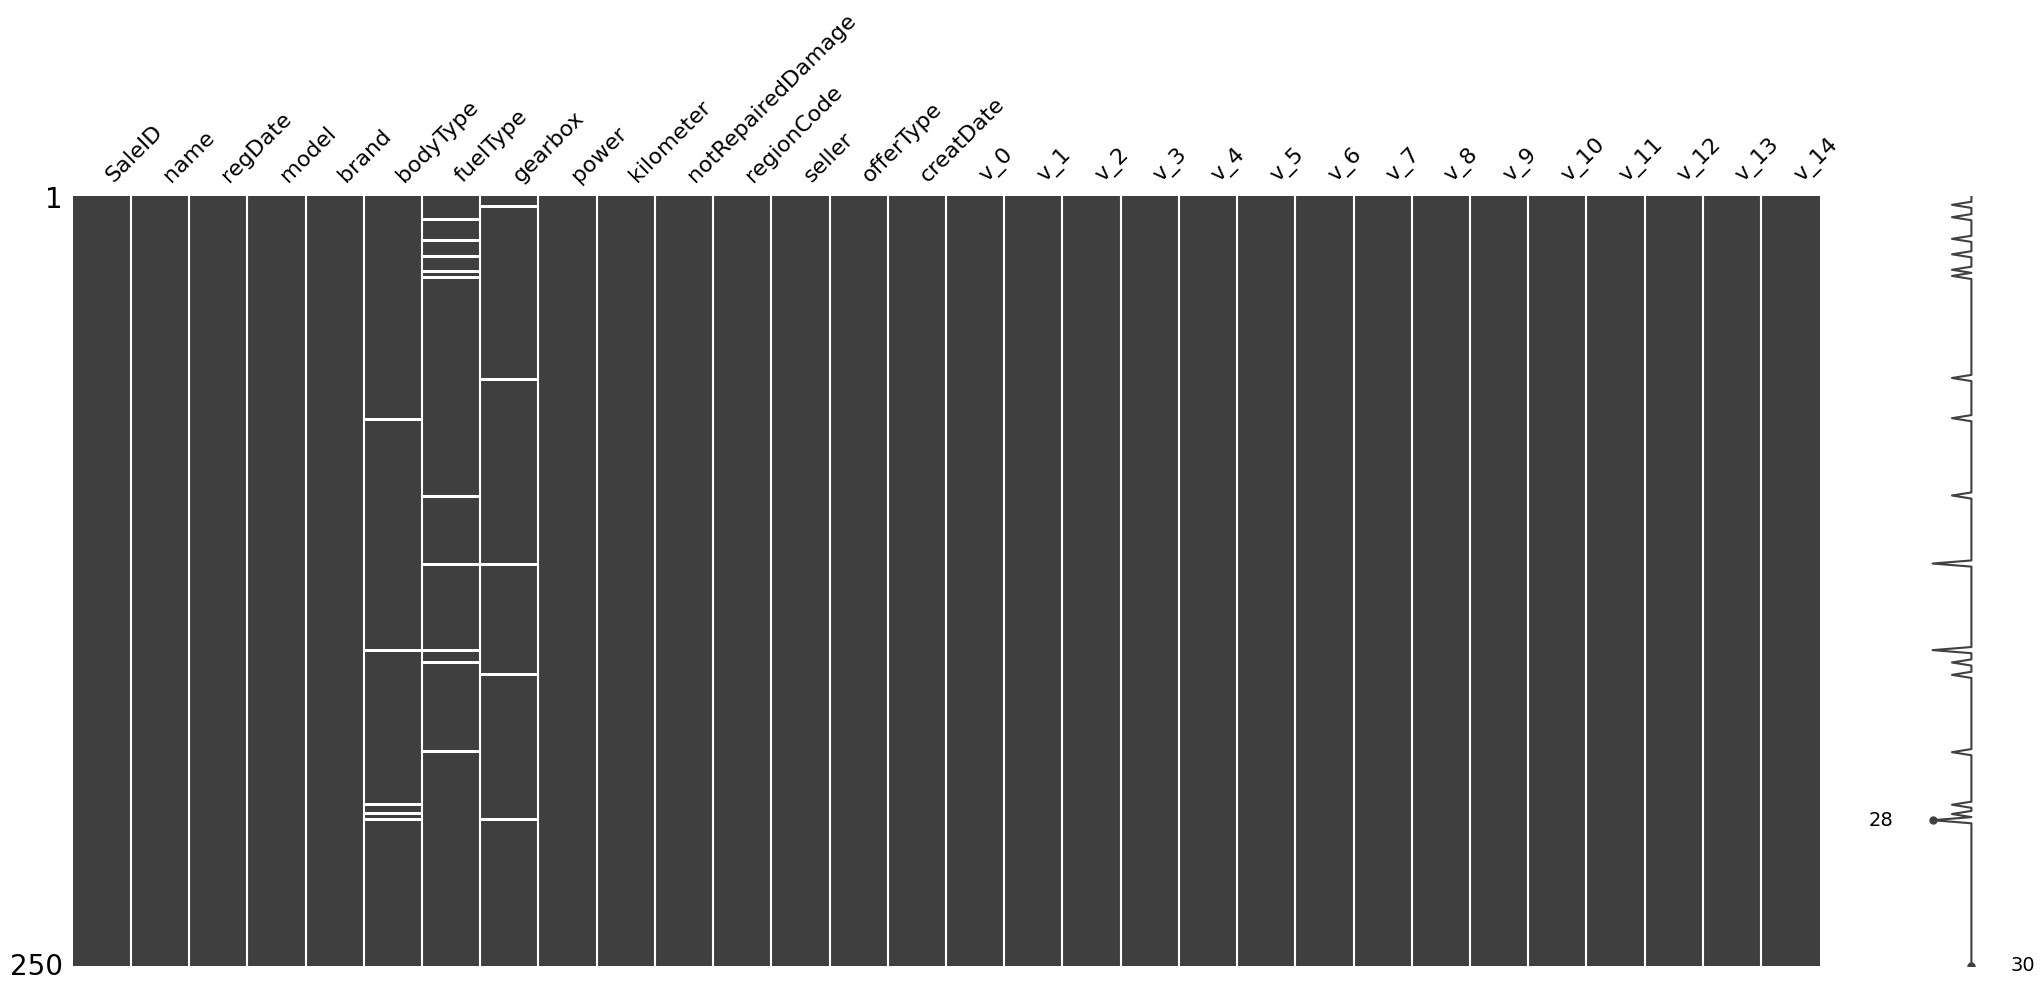

In [17]:
# 可视化看下缺省值
msno.matrix(Test_data.sample(250))

<Axes: >

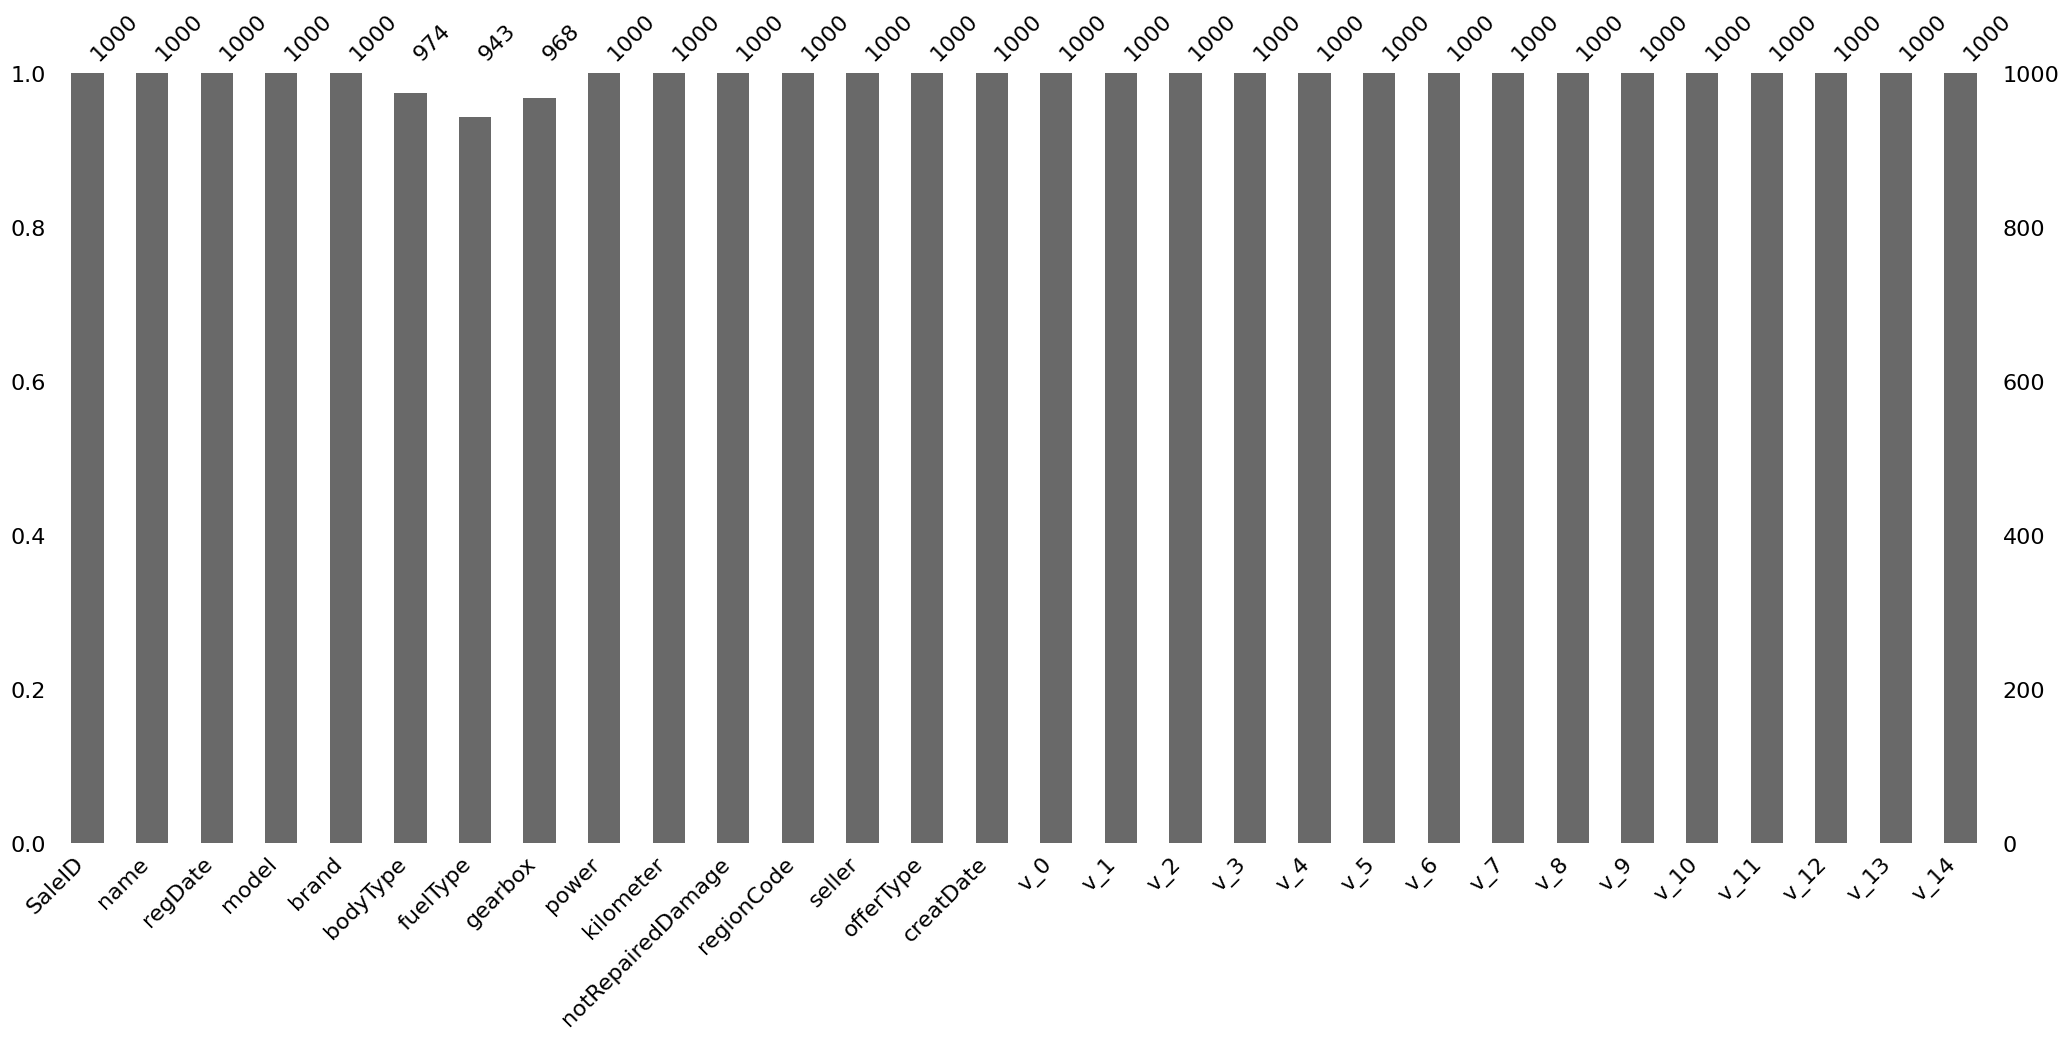

In [18]:
msno.bar(Test_data.sample(1000))

测试集的缺省和训练集的差不多情况，可视化有四列有缺省，notRepairedDamage 缺省的最多。

In [19]:
## 2) 查看异常值检测
Train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 31 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   SaleID             150000 non-null  int64  
 1   name               150000 non-null  int64  
 2   regDate            150000 non-null  int64  
 3   model              149999 non-null  float64
 4   brand              150000 non-null  int64  
 5   bodyType           145494 non-null  float64
 6   fuelType           141320 non-null  float64
 7   gearbox            144019 non-null  float64
 8   power              150000 non-null  int64  
 9   kilometer          150000 non-null  float64
 10  notRepairedDamage  150000 non-null  object 
 11  regionCode         150000 non-null  int64  
 12  seller             150000 non-null  int64  
 13  offerType          150000 non-null  int64  
 14  creatDate          150000 non-null  int64  
 15  price              150000 non-null  int64  
 16  v_

可以看出来 '-' 也为空缺值，因为很多模型对 NaN 有直接的处理，这里我们先不做处理，先替换成 NaN。

In [20]:
Train_data['notRepairedDamage'].replace('-', np.nan, inplace=True)

In [21]:
Train_data['notRepairedDamage'].value_counts()

notRepairedDamage
0.0    111361
1.0     14315
Name: count, dtype: int64

In [22]:
Train_data.isnull().sum()

SaleID                   0
name                     0
regDate                  0
model                    1
brand                    0
bodyType              4506
fuelType              8680
gearbox               5981
power                    0
kilometer                0
notRepairedDamage    24324
regionCode               0
seller                   0
offerType                0
creatDate                0
price                    0
v_0                      0
v_1                      0
v_2                      0
v_3                      0
v_4                      0
v_5                      0
v_6                      0
v_7                      0
v_8                      0
v_9                      0
v_10                     0
v_11                     0
v_12                     0
v_13                     0
v_14                     0
dtype: int64

In [23]:
Train_data['notRepairedDamage'].isnull().sum()

np.int64(24324)

In [24]:
Test_data['notRepairedDamage'].value_counts()

notRepairedDamage
0.0    37224
-       8069
1.0     4707
Name: count, dtype: int64

In [25]:
Test_data['notRepairedDamage'].replace('-', np.nan, inplace=True)

以下两个类别特征严重倾斜，一班不会对预测有什么帮助，故这边先删除，当然你也可以继续挖掘，但是一般意义不大。

In [26]:
Train_data['seller'].value_counts()

seller
0    149999
1         1
Name: count, dtype: int64

In [27]:
Train_data['offerType'].value_counts()

offerType
0    150000
Name: count, dtype: int64

In [28]:
del Train_data['seller']
del Train_data['offerType']
del Test_data['seller']
del Test_data['offerType']

## 了解预测值的分布

In [29]:
Train_data['price']

0         1850
1         3600
2         6222
3         2400
4         5200
          ... 
149995    5900
149996    9500
149997    7500
149998    4999
149999    4700
Name: price, Length: 150000, dtype: int64

In [30]:
Train_data['price'].value_counts()

price
500      2337
1500     2158
1200     1922
1000     1850
2500     1821
         ... 
9395        1
81900       1
16699       1
11998       1
14780       1
Name: count, Length: 3763, dtype: int64

<Axes: title={'center': 'Log Normal'}, xlabel='price'>

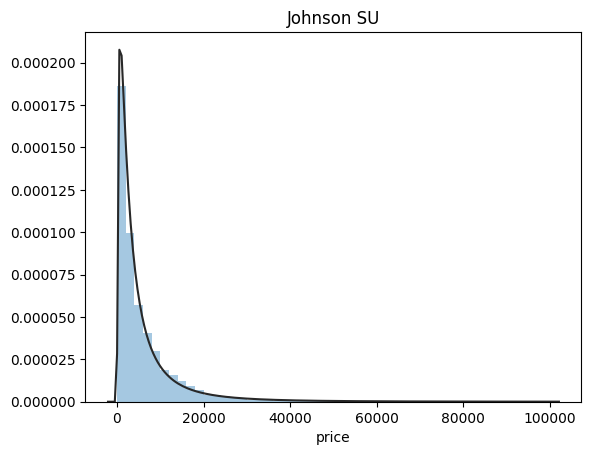

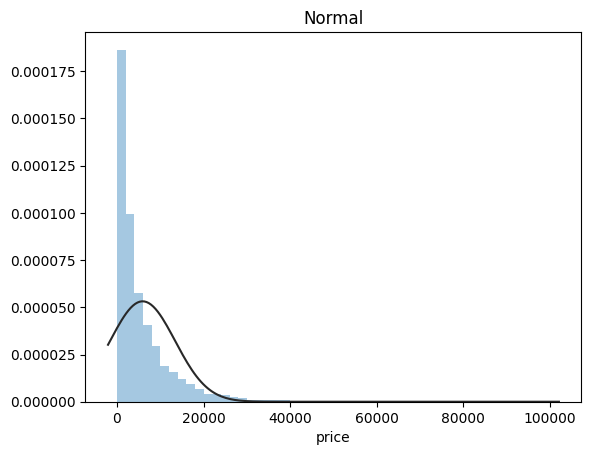

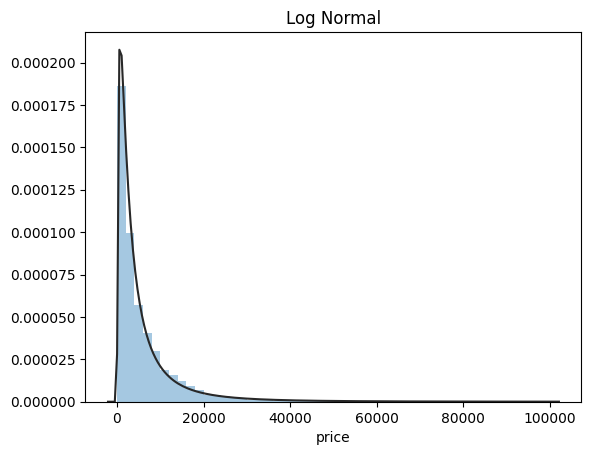

In [31]:
## 1) 总体分布概况（无界约翰逊分布等）
import scipy.stats as st

y = Train_data['price']

plt.figure(1)
plt.title('Johnson SU')
sns.distplot(y, kde=False, fit=st.johnsonsu)

plt.figure(2)
plt.title('Normal')
sns.distplot(y, kde=False, fit=st.norm)

plt.figure(3)
plt.title('Log Normal')
sns.distplot(y, kde=False, fit=st.lognorm)

价格不服从正态分布，所以在进行回归之前，它必须进行转换。虽然对数变化做得很好，但最佳拟合是无界约翰逊分布。

Skewness: 3.346487
Kurtosis: 18.995183


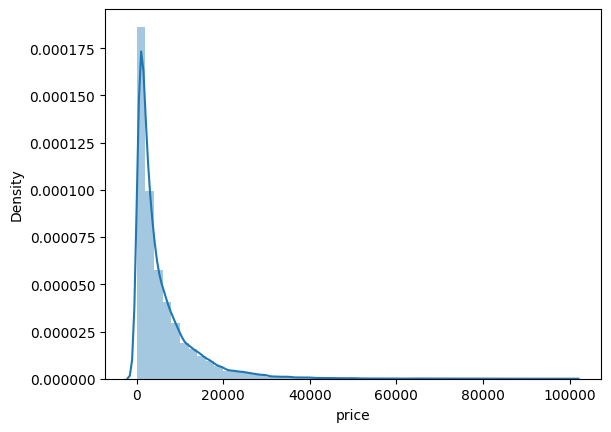

In [32]:
## 2) 查看 skewness and kurtosis
sns.distplot(Train_data['price'])
print('Skewness: %f' % Train_data['price'].skew())
print('Kurtosis: %f' % Train_data['price'].kurt())

In [33]:
Train_data.skew()
Train_data.kurt()

SaleID                      -1.2
name                   -1.039945
regDate                -0.697308
model                   1.740483
brand                   1.076201
bodyType                0.206937
fuelType                5.880049
gearbox                -0.264161
power                5733.451054
kilometer               1.141934
notRepairedDamage       3.908072
regionCode             -0.340832
creatDate            6881.080328
price                  18.995183
v_0                     3.993841
v_1                    -1.753017
v_2                    23.860591
v_3                    -0.418006
v_4                    -0.197295
v_5                    22.934081
v_6                    -1.742567
v_7                    25.845489
v_8                    -0.636225
v_9                    -0.321491
v_10                   -0.577935
v_11                   12.568731
v_12                    0.268937
v_13                   -0.438274
v_14                    2.393526
dtype: object

<Axes: xlabel='Skewness', ylabel='Density'>

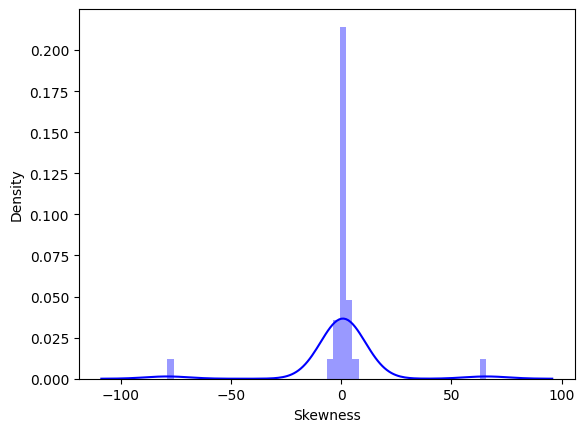

In [34]:
sns.distplot(Train_data.skew(), color='blue', axlabel='Skewness')

<Axes: xlabel='Kurtness', ylabel='Density'>

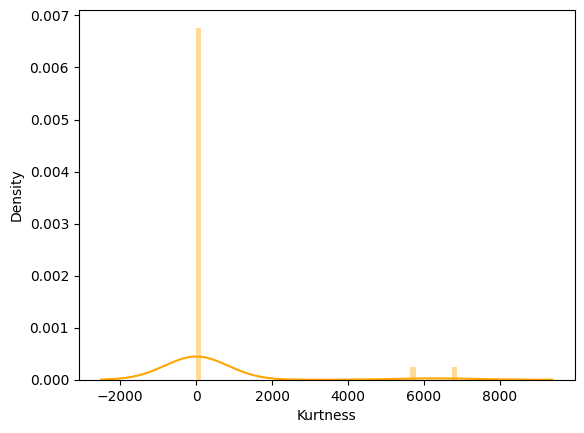

In [35]:
sns.distplot(Train_data.kurt(), color='orange', axlabel='Kurtness')

.skew()，.kurt() 说明参考 [https://www.cnblogs.com/wyy1480/p/10474046.html](https://www.cnblogs.com/wyy1480/p/10474046.html)

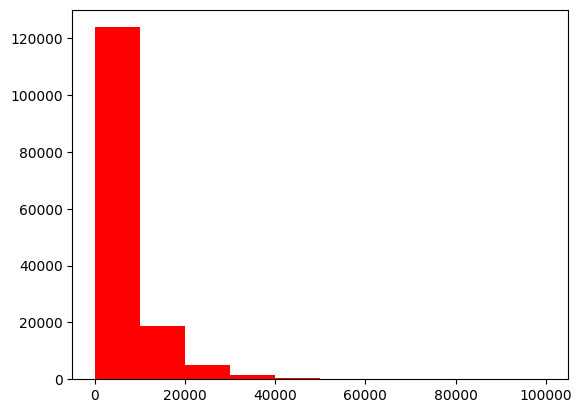

In [36]:
## 3) 查看预测值的具体频数
plt.hist(Train_data['price'], orientation='vertical', histtype='bar', color='red')
plt.show()

查看频数，大于 20000 的值极少，其实这里也可以把这些当作特殊的值（异常值）直接用填充或者删掉。

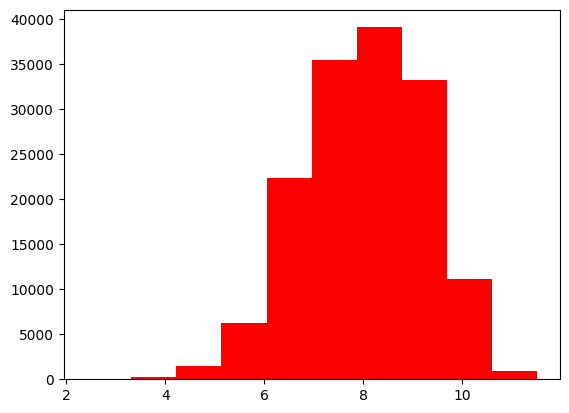

In [37]:
# log变换 z之后的分布较均匀，可以进行 log 变换进行预测，这也是预测问题常用的 trick
plt.hist(np.log(Train_data['price']), orientation='vertical', histtype='bar', color='red')
plt.show()

## 特征分为类别特征和数字特征，并对类别特征查看 unique 分布

### 数据类型

列

- name - 汽车编码
- regDate - 汽车注册时间
- model - 车型编码
- brand - 品牌
- bodyType - 车身类型
- fuelType - 燃油类型
- gearbox - 变速箱
- power - 汽车功率
- kilometer - 汽车行驶里程
- notRepairedDamage - 汽车有尚未修复的损坏
- regionCode - 看车地区编码
- seller - 销售方
- offerType - 报价类型
- creatDate - 广告发布时间
- price - 汽车价格
- v\_0, v\_1, v\_2, v\_3, v\_4, v\_5, v\_6, v\_7, v\_8, v\_9, v\_10, v\_11, v\_12, v\_13, v\_14 - 匿名特征，包含 v0 - v14 在内 15 个匿名特征

In [38]:
# 分离 label 即预测值
Y_train = Train_data['price']

In [39]:
# 这个区别方式适用于没有直接label coding的数据
# 这里不适用，需要人为根据实际含义来区分
# 数字特征
# numeric_features = Train_data.select_dtypes(include=[np.number])
# numeric_features.columns
# # 类型特征
# categorical_features = Train_data.select_dtypes(include=[np.object])
# categorical_features.columns

In [40]:
numeric_features = ['power', 'kilometer', 'v_0', 'v_1', 'v_2', 'v_3', 'v_4', 'v_5', 'v_6', 'v_7', 'v_8', 'v_9', 'v_10', 'v_11', 'v_12', 'v_13','v_14']

categorical_features = ['name', 'model', 'brand', 'bodyType', 'fuelType', 'gearbox', 'notRepairedDamage', 'regionCode']

In [41]:
# 特征 nunique 分布
for cat_fea in categorical_features:
    print(f'{cat_fea}的特征分布如下：')
    print('{}特征有个{}不同的值'.format(cat_fea, Train_data[cat_fea].nunique()))
    print(Train_data[cat_fea].value_counts())

name的特征分布如下：
name特征有个99662不同的值
name
708       282
387       282
55        280
1541      263
203       233
         ... 
119983      1
63443       1
104410      1
154956      1
177672      1
Name: count, Length: 99662, dtype: int64
model的特征分布如下：
model特征有个248不同的值
model
0.0      11762
19.0      9573
4.0       8445
1.0       6038
29.0      5186
         ...  
240.0        2
209.0        2
245.0        2
242.0        2
247.0        1
Name: count, Length: 248, dtype: int64
brand的特征分布如下：
brand特征有个40不同的值
brand
0     31480
4     16737
14    16089
10    14249
1     13794
6     10217
9      7306
5      4665
13     3817
11     2945
3      2461
7      2361
16     2223
8      2077
25     2064
27     2053
21     1547
15     1458
19     1388
20     1236
12     1109
22     1085
26      966
30      940
17      913
24      772
28      649
32      592
29      406
37      333
2       321
31      318
18      316
36      228
34      227
33      218
23      186
35      180
38       65
39        9
Name: count,

In [42]:
# 特征 nunique 分布
for cat_fea in categorical_features:
    print(f'{cat_fea}的特征分布如下：')
    print('{}特征有个{}不同的值'.format(cat_fea, Test_data[cat_fea].nunique()))
    print(Test_data[cat_fea].value_counts())

name的特征分布如下：
name特征有个37536不同的值
name
387       94
55        93
1541      86
708       85
203       78
          ..
69206      1
125326     1
82297      1
168470     1
78202      1
Name: count, Length: 37536, dtype: int64
model的特征分布如下：
model特征有个245不同的值
model
0.0      3772
19.0     3226
4.0      2790
1.0      1981
29.0     1778
         ... 
209.0       2
229.0       2
241.0       1
242.0       1
244.0       1
Name: count, Length: 245, dtype: int64
brand的特征分布如下：
brand特征有个40不同的值
brand
0     10473
4      5532
14     5345
10     4713
1      4627
6      3500
9      2360
5      1485
13     1386
11      942
3       820
16      770
25      728
7       727
8       708
27      623
21      543
15      476
19      473
20      411
12      399
22      358
26      328
30      321
17      312
24      248
28      216
32      183
29      139
37      117
2       115
31      113
18      107
33       84
35       75
34       75
36       72
23       60
38       31
39        5
Name: count, dtype: int64
bodyType

## 数字特征分析

In [43]:
numeric_features.append('price')

In [44]:
numeric_features

['power',
 'kilometer',
 'v_0',
 'v_1',
 'v_2',
 'v_3',
 'v_4',
 'v_5',
 'v_6',
 'v_7',
 'v_8',
 'v_9',
 'v_10',
 'v_11',
 'v_12',
 'v_13',
 'v_14',
 'price']

In [45]:
Train_data.head()

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,notRepairedDamage,regionCode,creatDate,price,v_0,v_1,v_2,v_3,v_4,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
0,0,736,20040402,30.0,6,1.0,0.0,0.0,60,12.5,0.0,1046,20160404,1850,43.357796,3.966344,0.050257,2.159744,1.143786,0.235676,0.101988,0.129549,0.022816,0.097462,-2.881803,2.804097,-2.420821,0.795292,0.914762
1,1,2262,20030301,40.0,1,2.0,0.0,0.0,0,15.0,NaN,4366,20160309,3600,45.305273,5.236112,0.137925,1.380657,-1.422165,0.264777,0.121004,0.135731,0.026597,0.020582,-4.900482,2.096338,-1.030483,-1.722674,0.245522
2,2,14874,20040403,115.0,15,1.0,0.0,0.0,163,12.5,0.0,2806,20160402,6222,45.978359,4.823792,1.319524,-0.998467,-0.996911,0.251410,0.114912,0.165147,0.062173,0.027075,-4.846749,1.803559,1.565330,-0.832687,-0.229963
3,3,71865,19960908,109.0,10,0.0,0.0,1.0,193,15.0,0.0,434,20160312,2400,45.687478,4.492574,-0.050616,0.883600,-2.228079,0.274293,0.110300,0.121964,0.033395,0.000000,-4.509599,1.285940,-0.501868,-2.438353,-0.478699
4,4,111080,20120103,110.0,5,1.0,0.0,0.0,68,5.0,0.0,6977,20160313,5200,44.383511,2.031433,0.572169,-1.571239,2.246088,0.228036,0.073205,0.091880,0.078819,0.121534,-1.896240,0.910783,0.931110,2.834518,1.923482


In [46]:
## 1) 相关性分析
price_numeric = Train_data[numeric_features]
correlation = price_numeric.corr()
# print(correlation)
price_correlations = correlation.loc[:, 'price'].sort_values(ascending=False)

print(price_correlations, '\n')

price        1.000000
v_12         0.692823
v_8          0.685798
v_0          0.628397
power        0.219834
v_5          0.164317
v_2          0.085322
v_6          0.068970
v_1          0.060914
v_14         0.035911
v_13        -0.013993
v_7         -0.053024
v_4         -0.147085
v_9         -0.206205
v_10        -0.246175
v_11        -0.275320
kilometer   -0.440519
v_3         -0.730946
Name: price, dtype: float64 



<Axes: title={'center': 'Correlation of Numeric Features with Price'}>

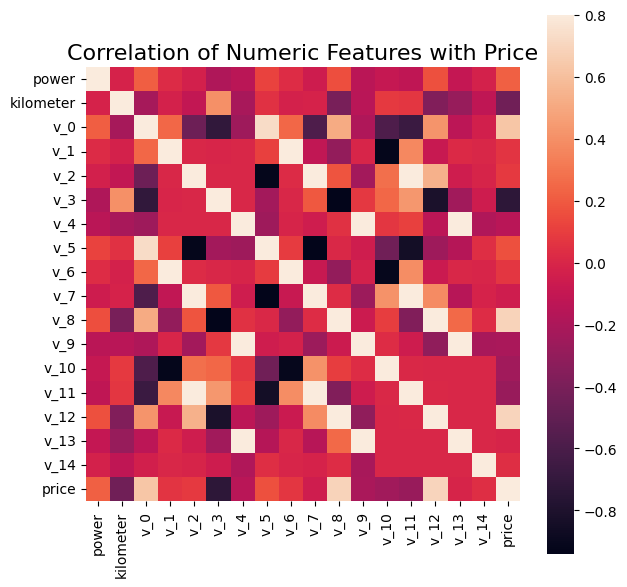

In [47]:
f, ax = plt.subplots(figsize=(7, 7))

plt.title('Correlation of Numeric Features with Price', y=1, size=16)

sns.heatmap(correlation, square=True, vmax=0.8)

In [48]:
del price_numeric['price']

In [49]:
## 2) 查看几个特征的偏度和峰值
for col in numeric_features:
    print('{:15}'.format(col), 'Skewness: {:05.2f}'.format(Train_data[col].skew()), '    ', 'Kurtosis: {:06.2f}'.format(Train_data[col].kurt()))

power           Skewness: 65.86      Kurtosis: 5733.45
kilometer       Skewness: -1.53      Kurtosis: 001.14
v_0             Skewness: -1.32      Kurtosis: 003.99
v_1             Skewness: 00.36      Kurtosis: -01.75
v_2             Skewness: 04.84      Kurtosis: 023.86
v_3             Skewness: 00.11      Kurtosis: -00.42
v_4             Skewness: 00.37      Kurtosis: -00.20
v_5             Skewness: -4.74      Kurtosis: 022.93
v_6             Skewness: 00.37      Kurtosis: -01.74
v_7             Skewness: 05.13      Kurtosis: 025.85
v_8             Skewness: 00.20      Kurtosis: -00.64
v_9             Skewness: 00.42      Kurtosis: -00.32
v_10            Skewness: 00.03      Kurtosis: -00.58
v_11            Skewness: 03.03      Kurtosis: 012.57
v_12            Skewness: 00.37      Kurtosis: 000.27
v_13            Skewness: 00.27      Kurtosis: -00.44
v_14            Skewness: -1.19      Kurtosis: 002.39
price           Skewness: 03.35      Kurtosis: 019.00


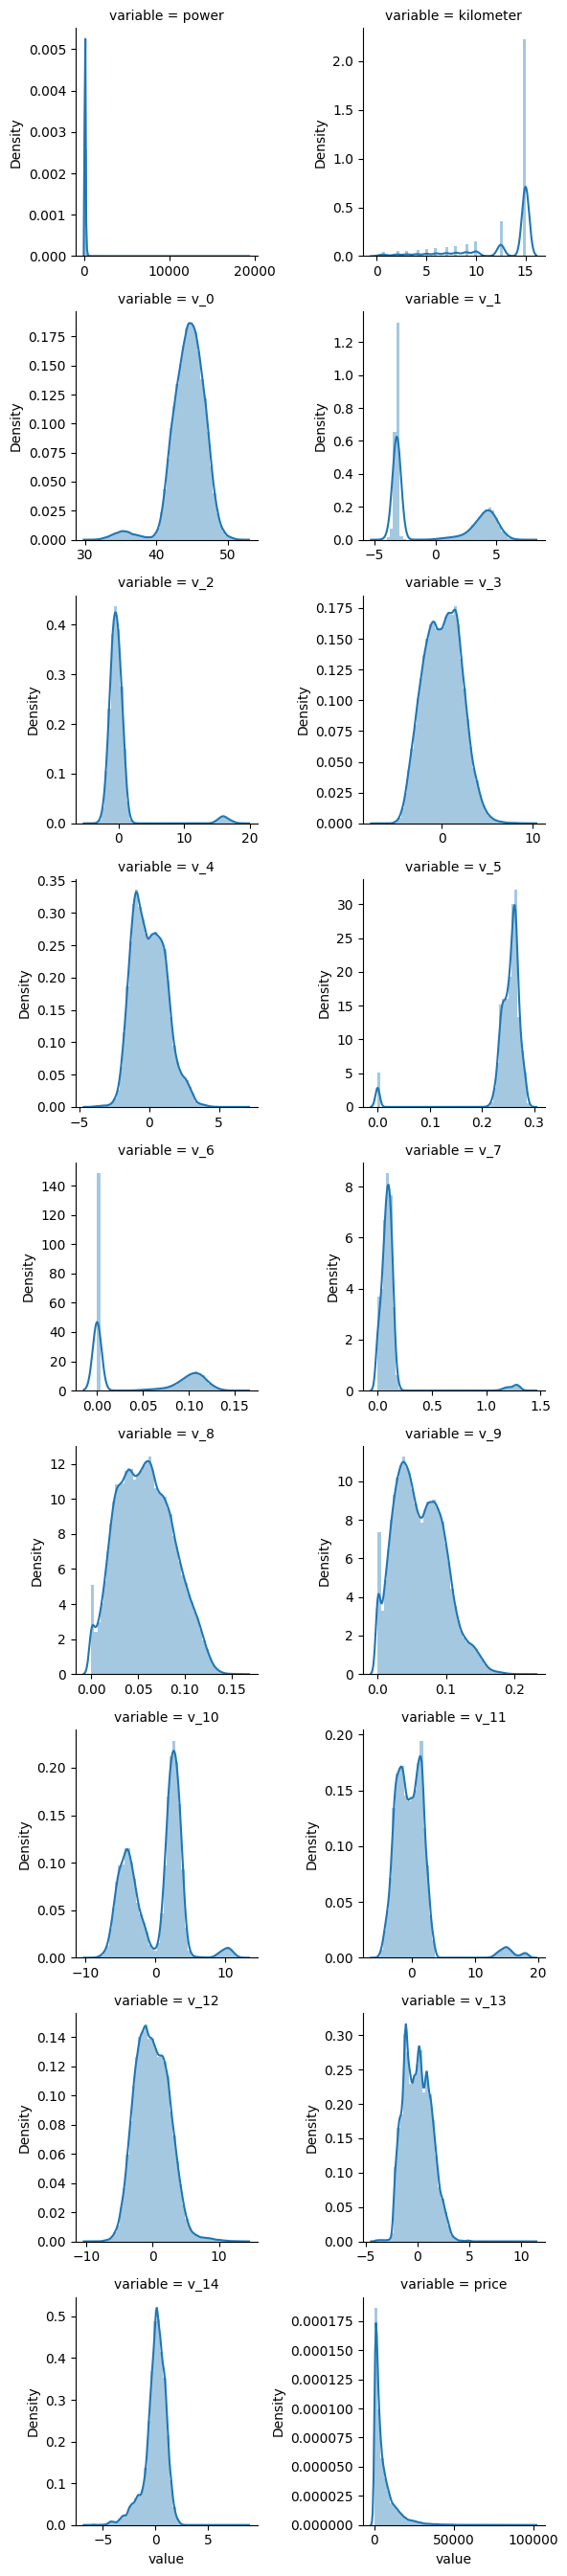

In [50]:
## 3) 每个数字特征的分布可视化
f = pd.melt(Train_data, value_vars=numeric_features)
g = sns.FacetGrid(f, col='variable', col_wrap=2, sharex=False, sharey=False)
g = g.map(sns.distplot, 'value')

### 可以看出匿名特征相对分布均匀

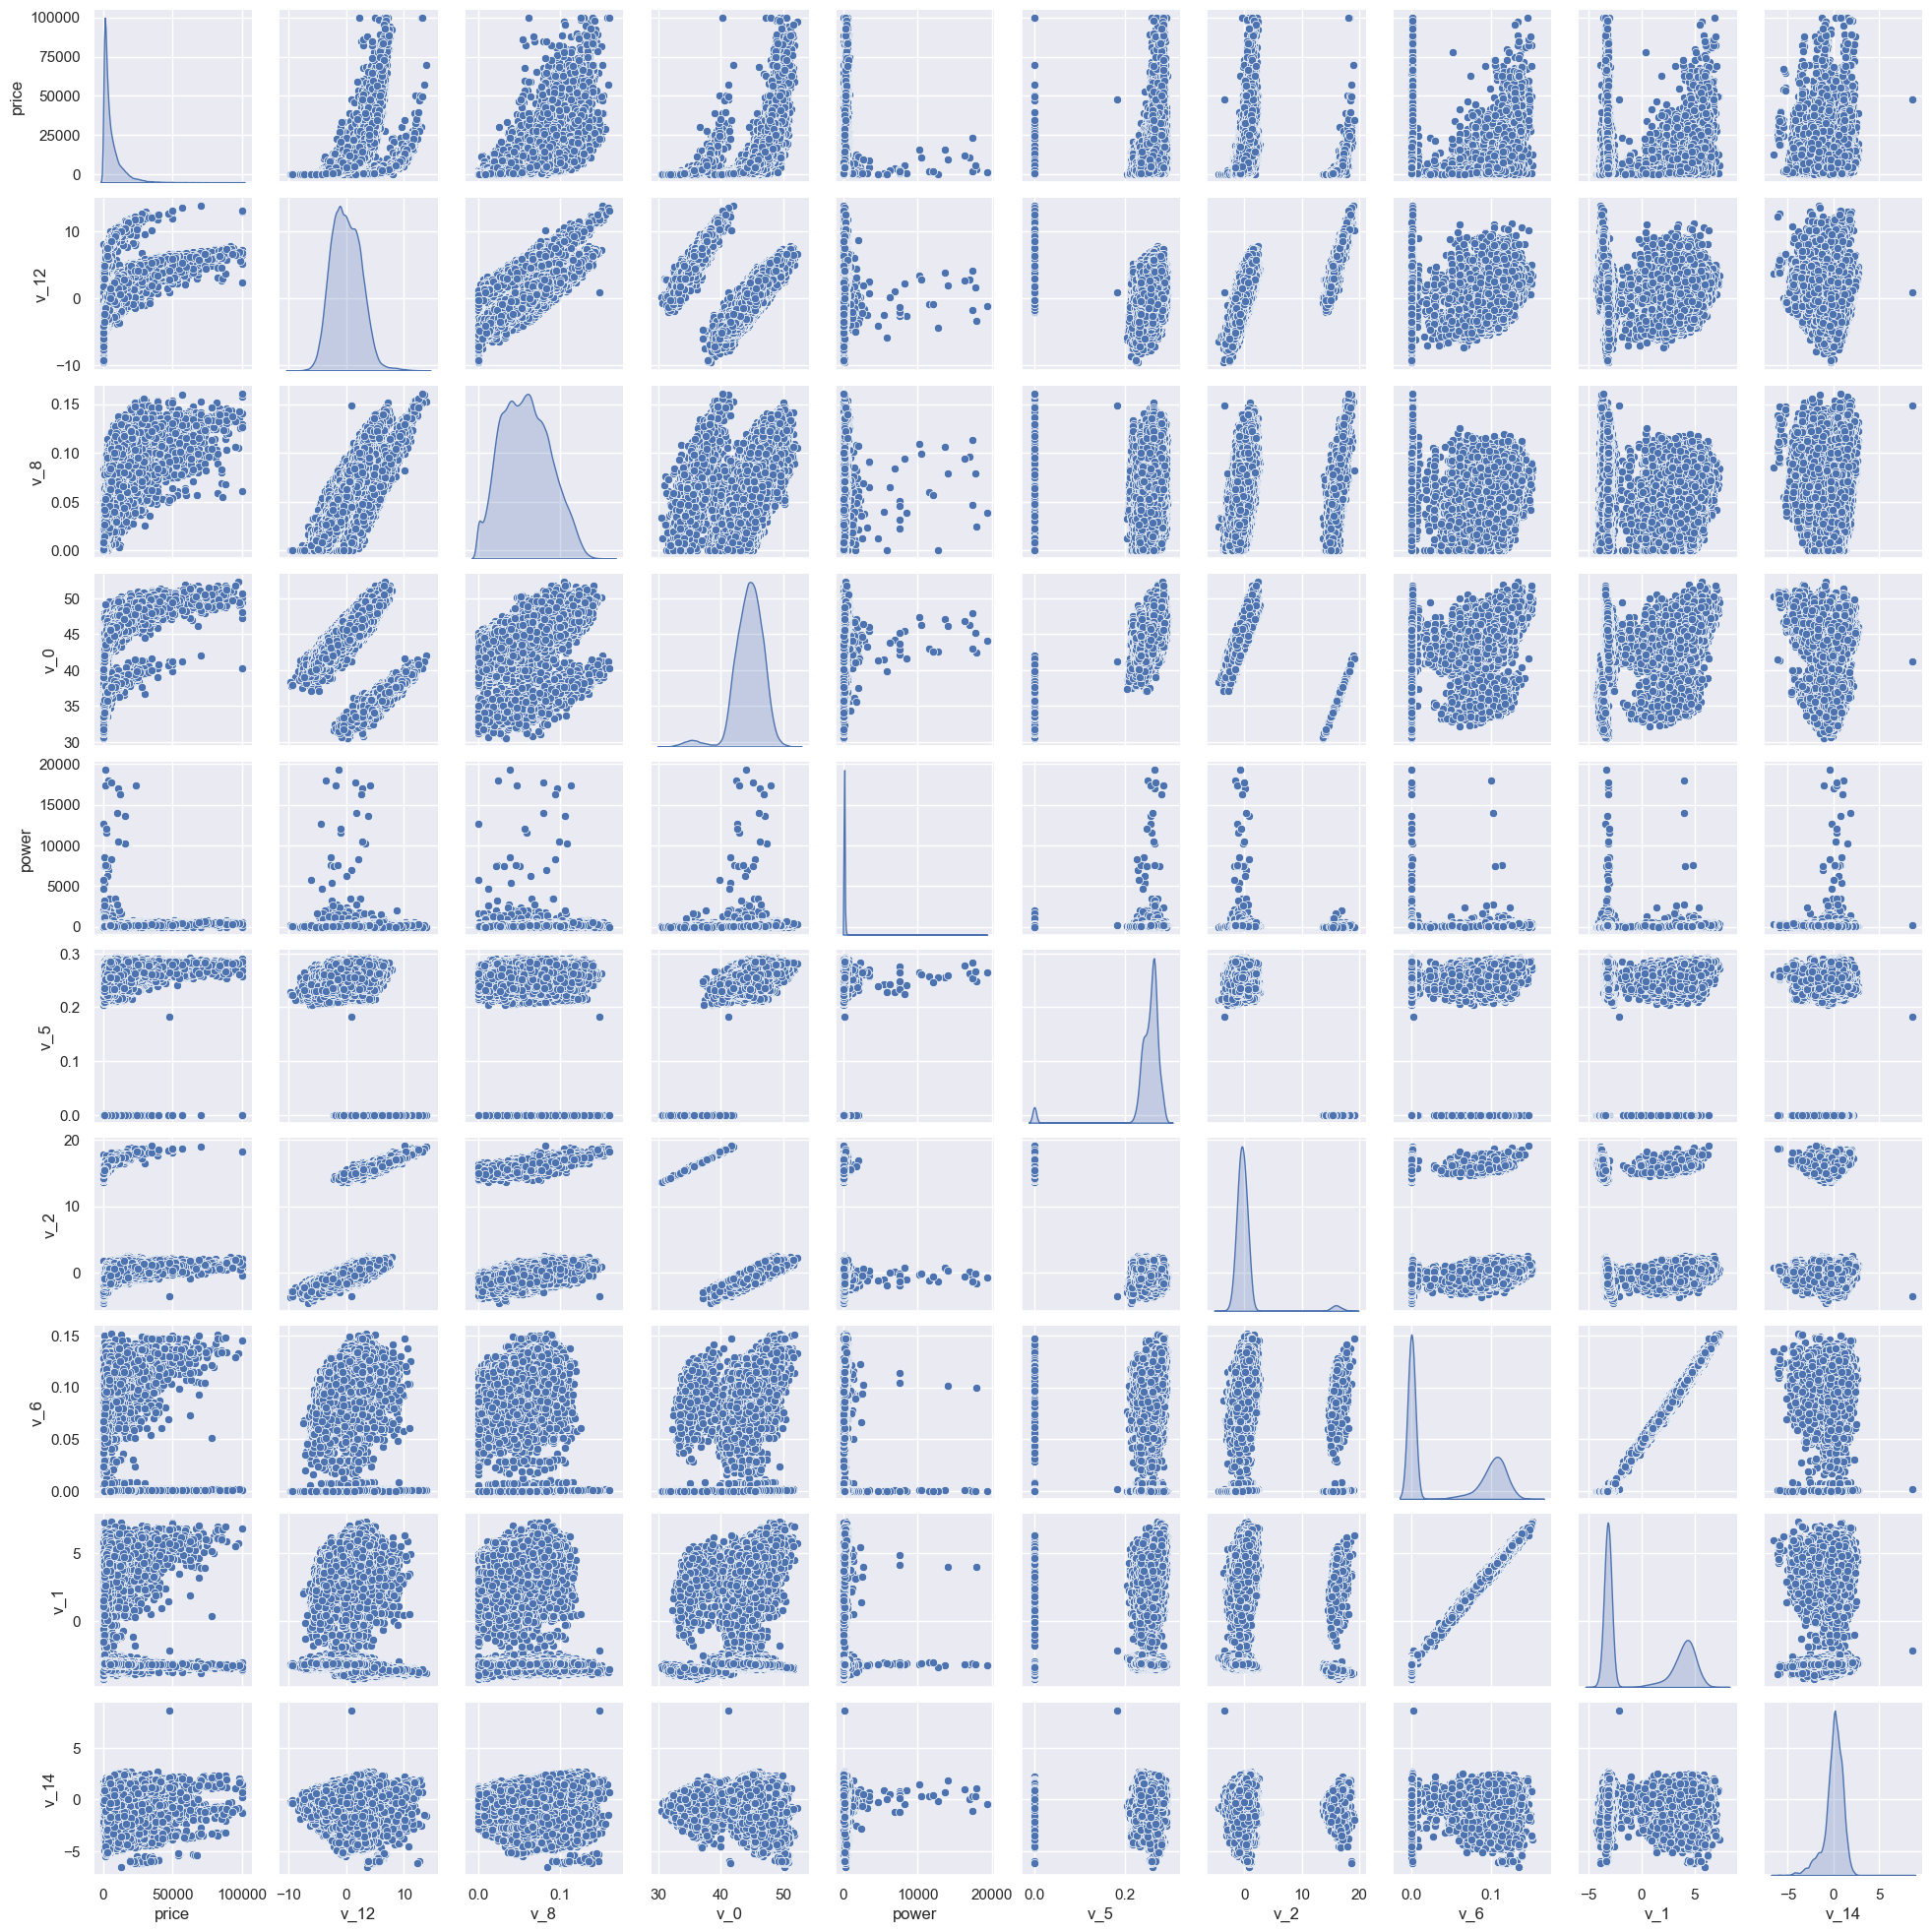

In [51]:
## 4) 数字特征相互之间的关系可视化
sns.set()
columns = ['price', 'v_12', 'v_8' , 'v_0', 'power', 'v_5',  'v_2', 'v_6', 'v_1', 'v_14']
sns.pairplot(Train_data[columns], size=2, kind='scatter', diag_kind='kde')
plt.show()

In [52]:
Train_data.columns

Index(['SaleID', 'name', 'regDate', 'model', 'brand', 'bodyType', 'fuelType',
       'gearbox', 'power', 'kilometer', 'notRepairedDamage', 'regionCode',
       'creatDate', 'price', 'v_0', 'v_1', 'v_2', 'v_3', 'v_4', 'v_5', 'v_6',
       'v_7', 'v_8', 'v_9', 'v_10', 'v_11', 'v_12', 'v_13', 'v_14'],
      dtype='object')

In [53]:
Y_train

0         1850
1         3600
2         6222
3         2400
4         5200
          ... 
149995    5900
149996    9500
149997    7500
149998    4999
149999    4700
Name: price, Length: 150000, dtype: int64

此处是多变量之间的关系可视化，可视化更多学习可参考这篇文章 [ttps://www.jianshu.com/p/6e18d21a4cad](ttps://www.jianshu.com/p/6e18d21a4cad)

<Axes: xlabel='v_13', ylabel='price'>

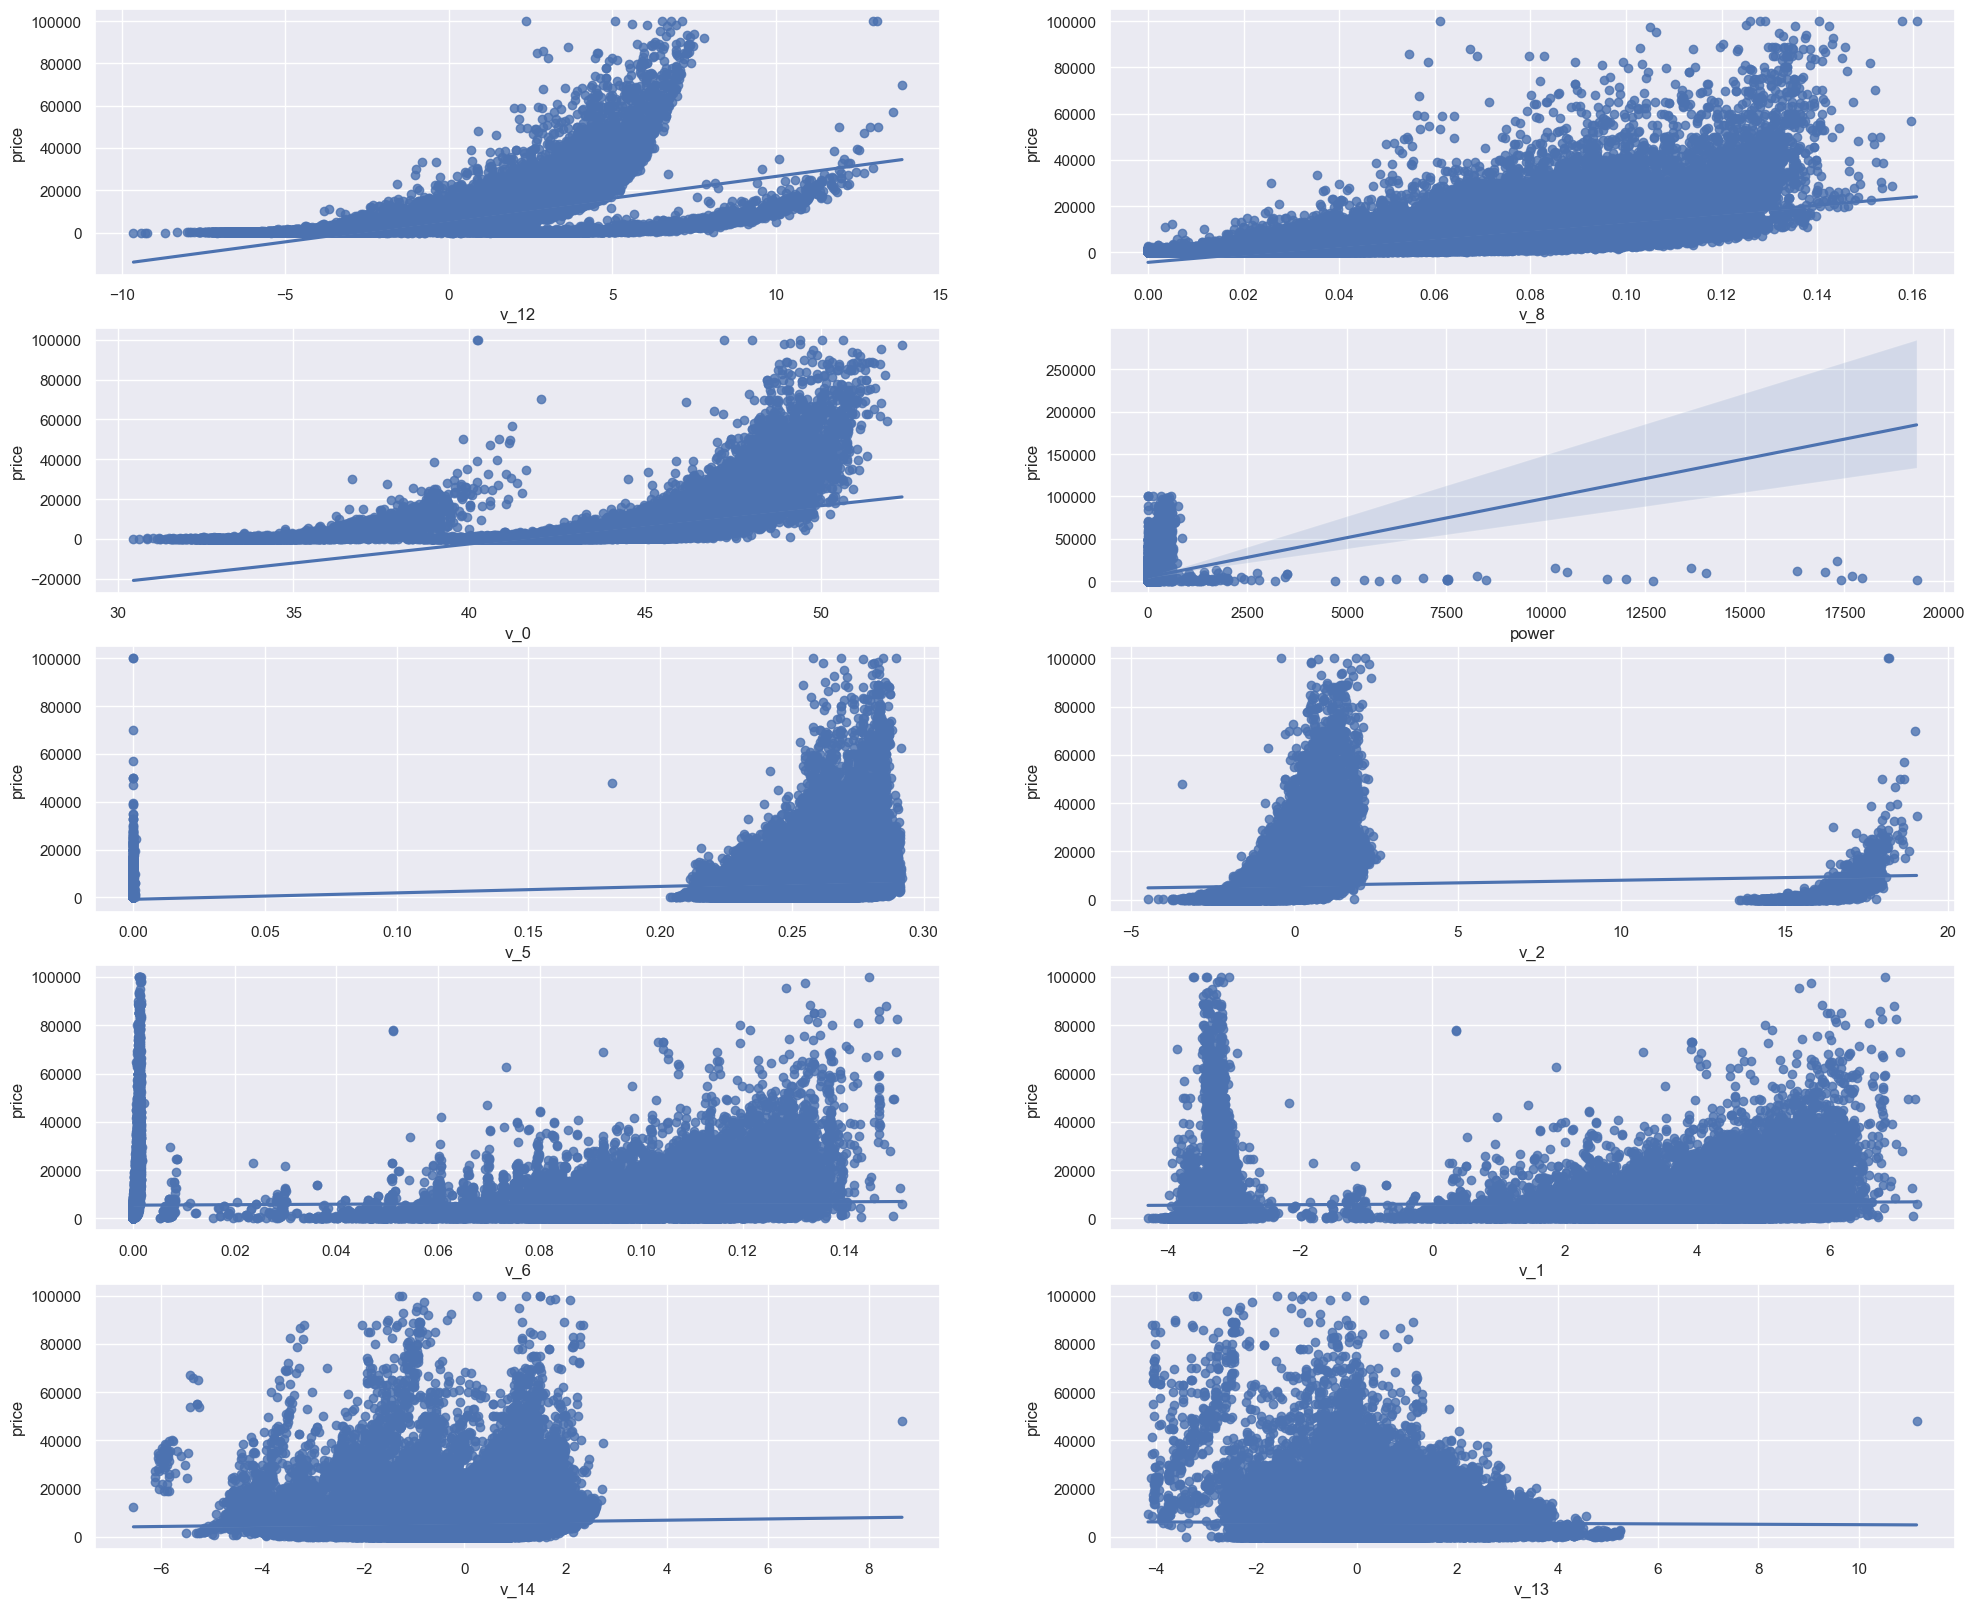

In [54]:
## 5) 多变量互相回归关系可视化
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8), (ax9, ax10)) = plt.subplots(nrows=5, ncols=2, figsize=(24, 20))
# ['v_12', 'v_8' , 'v_0', 'power', 'v_5',  'v_2', 'v_6', 'v_1', 'v_14']
v_12_scatter_plot = pd.concat([Y_train, Train_data['v_12']], axis=1)
sns.regplot(x='v_12', y='price', data=v_12_scatter_plot, scatter=True, fit_reg=True, ax=ax1)

v_8_scatter_plot = pd.concat([Y_train, Train_data['v_8']], axis=1)
sns.regplot(x='v_8', y='price', data=v_8_scatter_plot, scatter=True, fit_reg=True, ax=ax2)

v_0_scatter_plot = pd.concat([Y_train,Train_data['v_0']],axis = 1)
sns.regplot(x='v_0',y = 'price',data = v_0_scatter_plot,scatter= True, fit_reg=True, ax=ax3)

power_scatter_plot = pd.concat([Y_train,Train_data['power']],axis = 1)
sns.regplot(x='power',y = 'price',data = power_scatter_plot,scatter= True, fit_reg=True, ax=ax4)

v_5_scatter_plot = pd.concat([Y_train,Train_data['v_5']],axis = 1)
sns.regplot(x='v_5',y = 'price',data = v_5_scatter_plot,scatter= True, fit_reg=True, ax=ax5)

v_2_scatter_plot = pd.concat([Y_train,Train_data['v_2']],axis = 1)
sns.regplot(x='v_2',y = 'price',data = v_2_scatter_plot,scatter= True, fit_reg=True, ax=ax6)

v_6_scatter_plot = pd.concat([Y_train,Train_data['v_6']],axis = 1)
sns.regplot(x='v_6',y = 'price',data = v_6_scatter_plot,scatter= True, fit_reg=True, ax=ax7)

v_1_scatter_plot = pd.concat([Y_train,Train_data['v_1']],axis = 1)
sns.regplot(x='v_1',y = 'price',data = v_1_scatter_plot,scatter= True, fit_reg=True, ax=ax8)

v_14_scatter_plot = pd.concat([Y_train,Train_data['v_14']],axis = 1)
sns.regplot(x='v_14',y = 'price',data = v_14_scatter_plot,scatter= True, fit_reg=True, ax=ax9)

v_13_scatter_plot = pd.concat([Y_train,Train_data['v_13']],axis = 1)
sns.regplot(x='v_13',y = 'price',data = v_13_scatter_plot,scatter= True, fit_reg=True, ax=ax10)

## 类别特征

In [55]:
## 1) nunique 分布
for fea in categorical_features:
    print(Train_data[fea].nunique())

99662
248
40
8
7
2
2
7905


In [56]:
categorical_features

['name',
 'model',
 'brand',
 'bodyType',
 'fuelType',
 'gearbox',
 'notRepairedDamage',
 'regionCode']

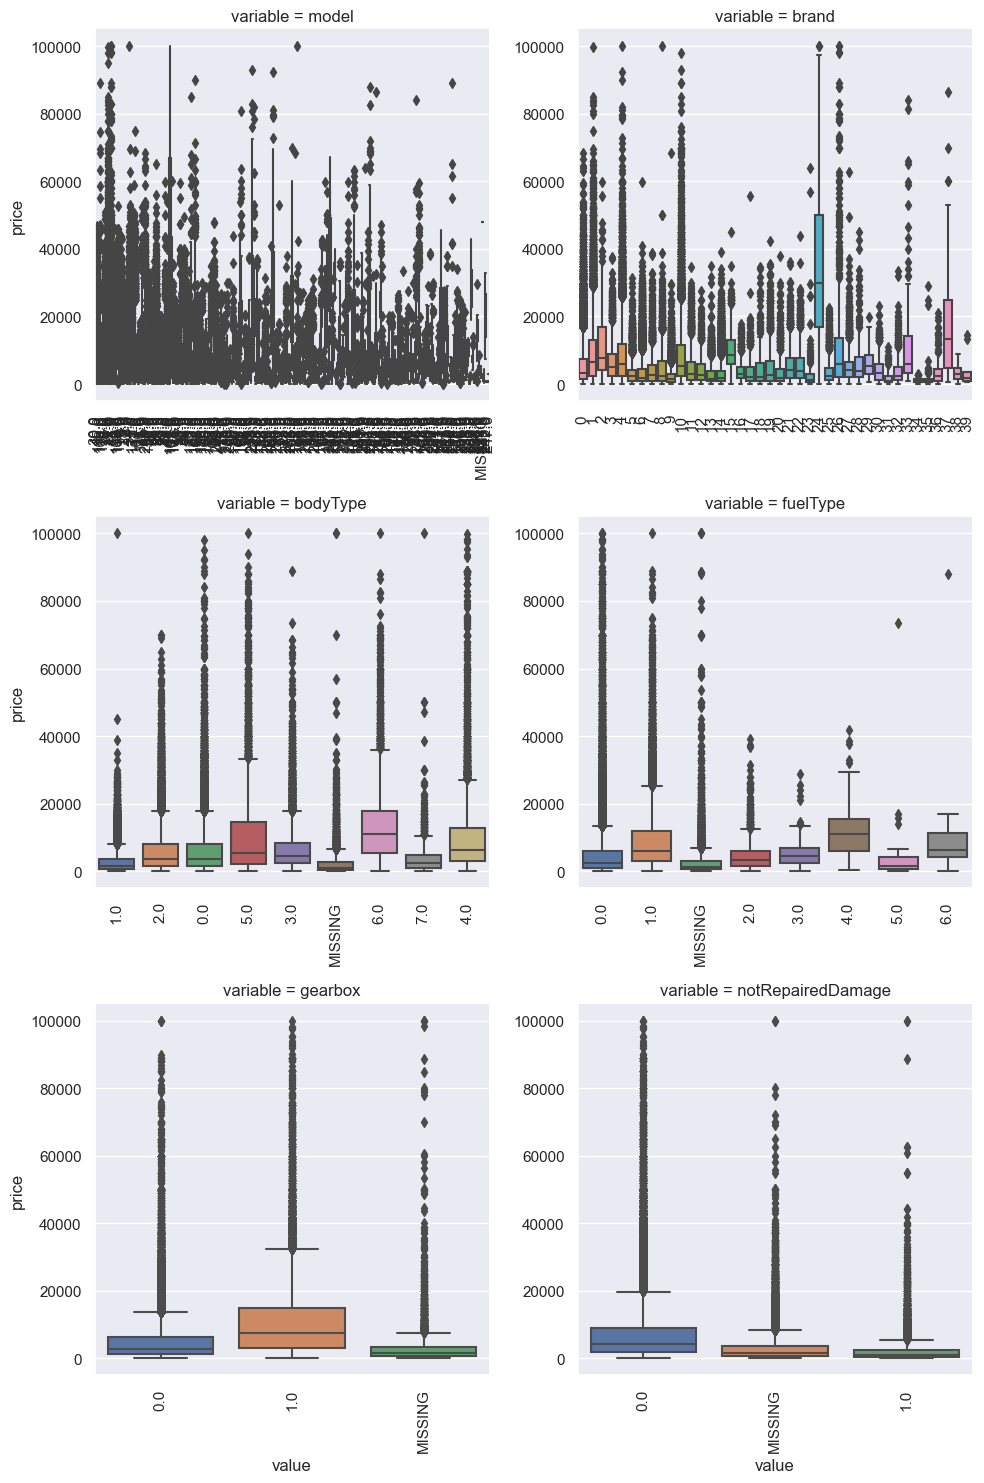

In [57]:
## 2) 类别特征箱型图可视化

# 因为 name 和 regionCode 的类别太稀疏了，这里我们把不稀疏的几类画一下
categorical_features = ['model', 'brand', 'bodyType', 'fuelType', 'gearbox', 'notRepairedDamage']

for c in categorical_features:
    Train_data[c] = Train_data[c].astype('category')
    if Train_data[c].isnull().any():
        Train_data[c] = Train_data[c].cat.add_categories(['MISSING'])
        Train_data[c] = Train_data[c].fillna('MISSING')

def boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x = plt.xticks(rotation=90)

f = pd.melt(Train_data, id_vars=['price'], value_vars=categorical_features)
g = sns.FacetGrid(f, col='variable', col_wrap=2, sharex=False, sharey=False, height=5)
g = g.map(boxplot, 'value', 'price')

In [58]:
Train_data.columns

Index(['SaleID', 'name', 'regDate', 'model', 'brand', 'bodyType', 'fuelType',
       'gearbox', 'power', 'kilometer', 'notRepairedDamage', 'regionCode',
       'creatDate', 'price', 'v_0', 'v_1', 'v_2', 'v_3', 'v_4', 'v_5', 'v_6',
       'v_7', 'v_8', 'v_9', 'v_10', 'v_11', 'v_12', 'v_13', 'v_14'],
      dtype='object')

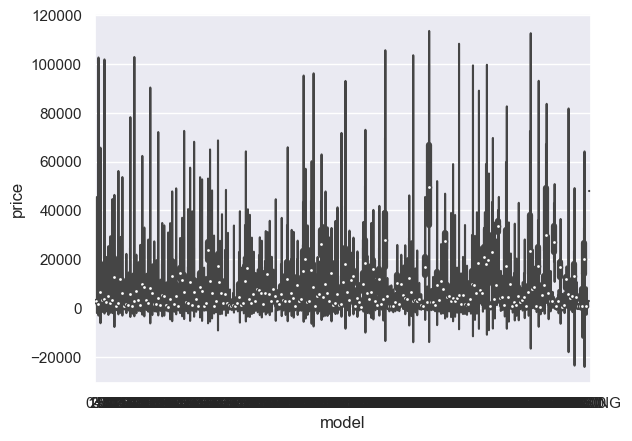

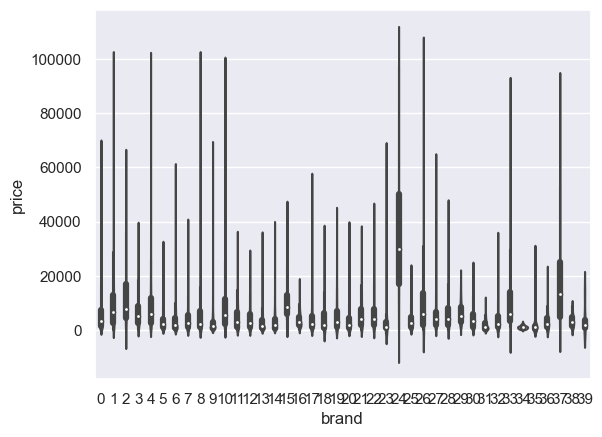

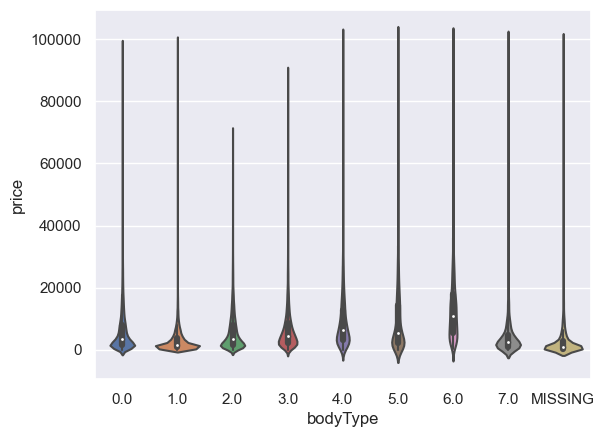

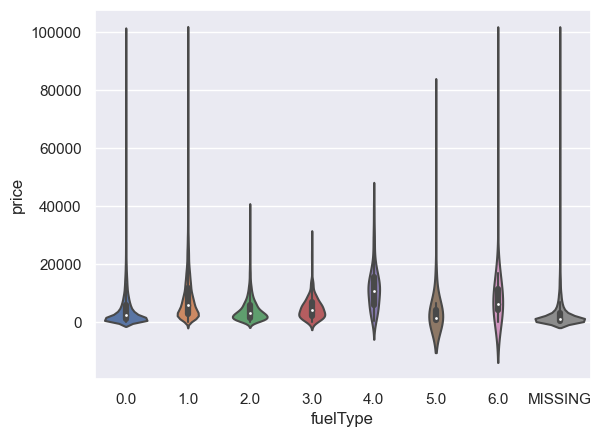

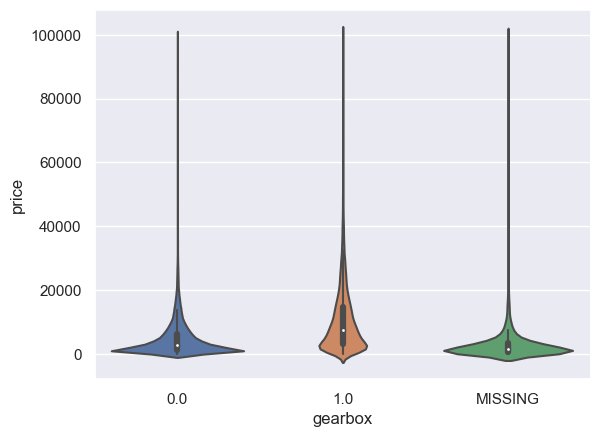

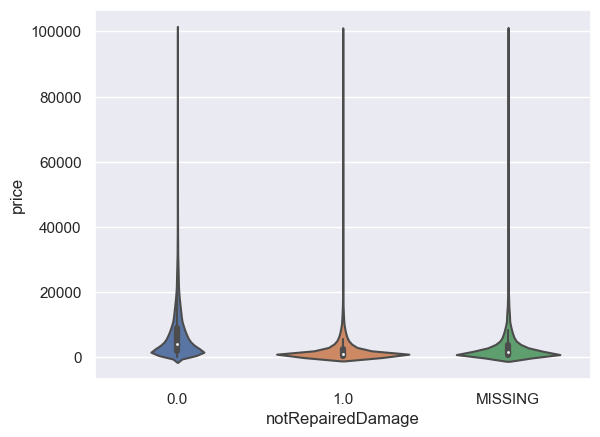

In [59]:
## 3) 类别特征的小提琴图可视化
catg_list = categorical_features
target = 'price'

for catg in catg_list:
    sns.violinplot(x=catg, y=target, data=Train_data)
    plt.show()

In [60]:
categorical_features = ['model', 'brand', 'bodyType', 'fuelType', 'gearbox', 'notRepairedDamage']

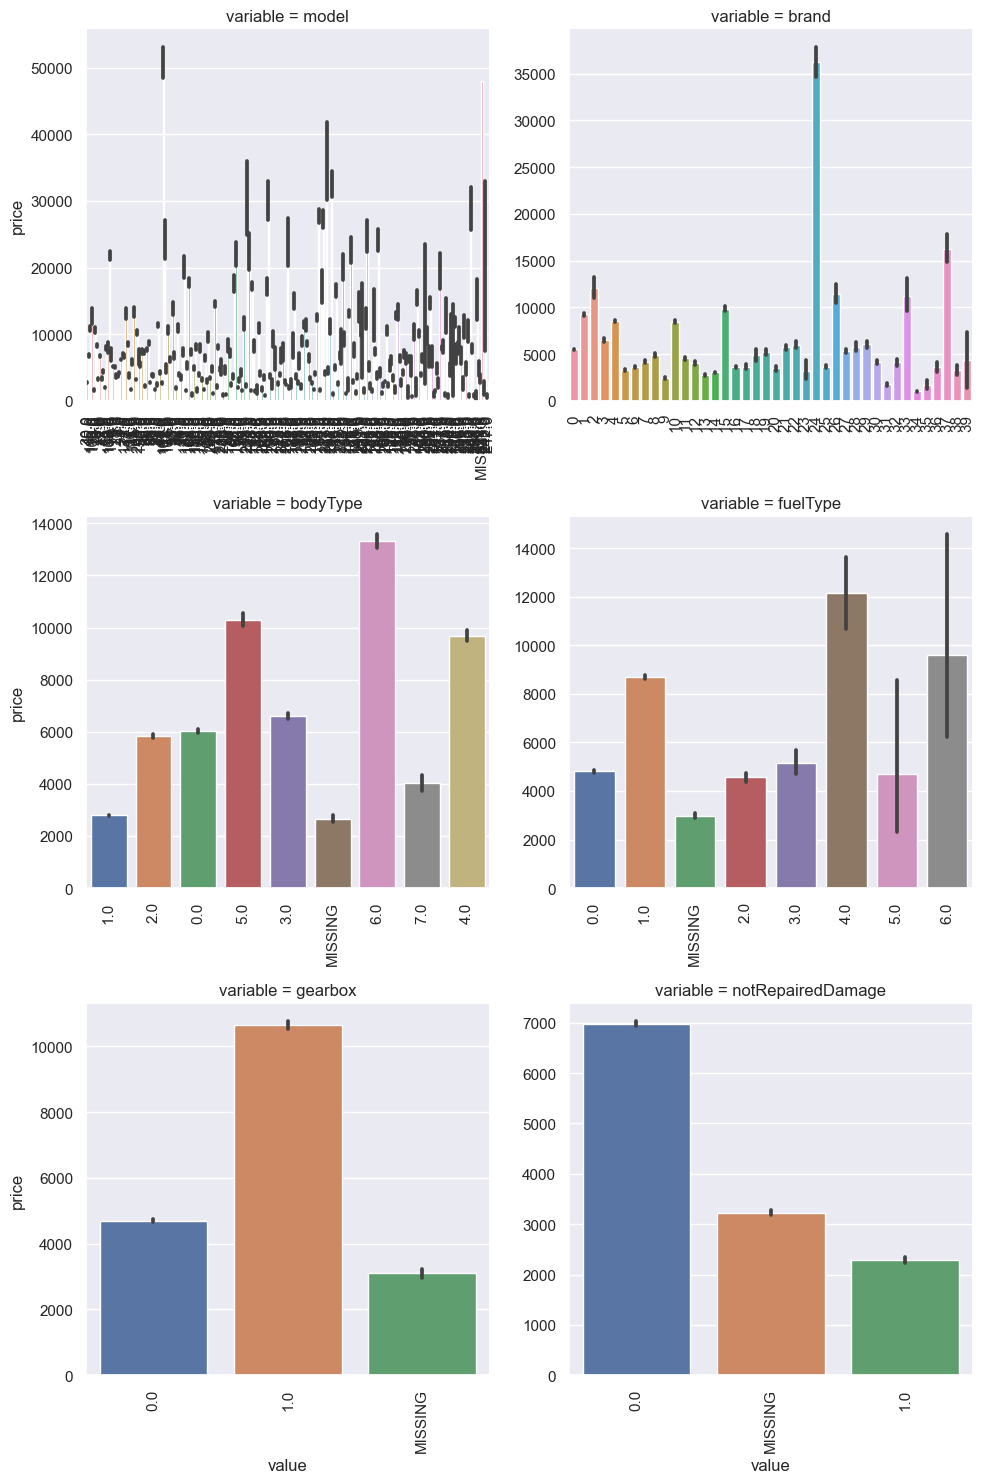

In [61]:
## 4) 类别特征的柱形图可视化
def bar_plot(x, y, **kwargs):
    sns.barplot(x=x, y=y)
    x=plt.xticks(rotation=90)

f = pd.melt(Train_data, id_vars=['price'], value_vars=categorical_features)
g = sns.FacetGrid(f, col='variable', col_wrap=2, sharex=False, sharey=False, height=5)
g = g.map(bar_plot, 'value', 'price')

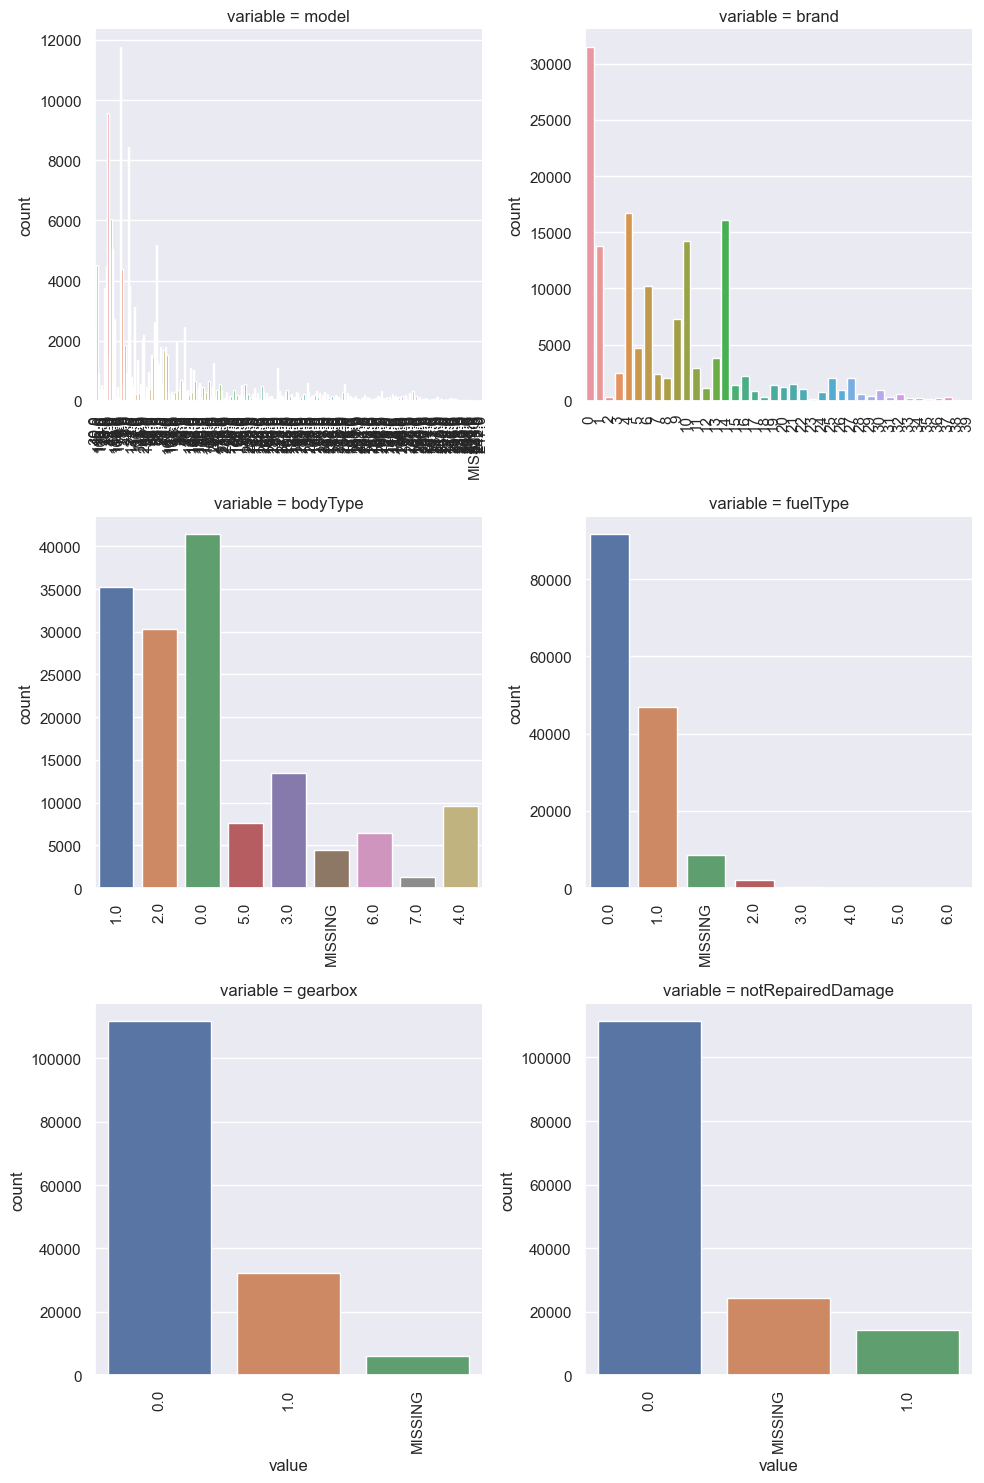

In [62]:
## 5) 类别特征的每个类别频数可视化（count_plot）
def count_plot(x, **kwargs):
    sns.countplot(x=x)
    x = plt.xticks(rotation=90)

f = pd.melt(Train_data, value_vars=categorical_features)
g = sns.FacetGrid(f, col='variable', col_wrap=2, sharex=False, sharey=False, height=5)
g = g.map(count_plot, 'value')

## 用 pandas_profiling 生成数据报告

用 pandas_profiling 生成一个较为全面的可视化数据报告（较为简单、方便）最终打开 html 文件。

In [63]:
from ydata_profiling import ProfileReport

pfr = ProfileReport(Train_data)
pfr.to_file(get_project_path('user_data', 'data-analysis.html'))

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 65.81it/s]


# 经验总结

所给出的 EDA 步骤是较为普遍的步骤。

在实际的工程或比赛中，这只是开始的第一步，也是最基础的一步。

接下来，一般需要结合模型的效果以及特征工程等来分析数据的实际建模情况。根据自己的一些理解，查阅文件，对实际问题做出判断和深入研究。

最后，通过不断进行 EDA 与数据处理和挖掘，来实现更好的数据结构和分布，以及较为强势相关的特征。

---
数据探索在机器学习中我们一般称为 EDA （Exploratory Data Analysis）：

> 是指已有的数据（特别是调查或观察得来的原始数据）在尽量少的先验假设下进行探索，通过 **作图**、**制表**、**方程拟合**、**计算特征量** 等手段探索数据的结构和规律的一种数据分析方法。

数据探索有利于我们发现数据的一些特性，数据之间的关联性，对于后续的特征构建是很有帮助的。

1. 对于数据的初步分析（直接查看数据，或者使用 `.sum()`、`.mean()`、`.describe()` 等统计函数）可以从 **样本数量**、**训练集数量**、**是否有时间特征**、**是否是时序问题**、**特征所代表的含义（非匿名特征）**、**特征类型（str、int、float、time）**、**特征的缺失情况（注意缺失在数据中的表现形式，有些是空的，有些是 NaN 符号等）**、**特征的均值方法情况**。
2. 分析记录某些特征值缺失占比 30% 以上样本的缺失处理，有助于后续的模型验证和调节，分析特征应该是 **填充（填充方式是什么，均值填充、零填充、众数填充等）**、**舍弃**，还是 **先做样本分类用不同的特征模型去预测**。
3. 对于异常值做专门的分析，分析特征异常的 label 是否为异常值（或者偏离均值较远或者是特殊符号），异常值是否应该 **剔除** 还是用正常值 **填充**，是记录异常还是机器本身异常等。
4. 对 label 做专门的分析，分析标签的分布情况等。
5. 进一步分析可以通过对特征作图，特征和 label 联合作图（统计图、离散图），直观了解特征的分布情况，通过这一步也可以发现数据中的一些异常值等。通过箱型图分析一些特征的偏离情况，对于特征和特征联合作图，对于特征和 label 联合作图，分析其中的一些相关性。
